# Challenge: Dataset banco portugues con el objetivo de predecir la variable No.21 que difiere en encontrar un modelo preciso donde recomienda el prestamo a la persona o no.

#Por Angelo Mauro Calderon.

##Se plantea el analisis descriptivo de los datos para avanzar con el modelado de varios sistemas de clasificacion ya que es una variable binaria para que luego se pueda elegir el mas conveniente en estos casos.##


# **Informacion previa del dataset:**

Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
   The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
   This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). 
   Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included. Note: the file can be read in R using: d=read.table("bank-additional-full.csv",header=TRUE,sep=";")
   
   The zip file includes two datasets: 
      1) bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

   The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

5. Number of Instances: 41188 for bank-additional-full.csv

6. Number of Attributes: 20 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2014].

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


Se inicia la importacion de librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [3]:
dataset = pd.read_csv('bank-additional-full.csv')
dataset.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


Los datos no estan separados por coma en columnas asi que se necesitara modificarlo para poder ser visualizado desde el Excel:

In [4]:
data_modif = files.upload()

Saving data_challenge_.csv to data_challenge_.csv


# **EDA** 

Segun el bloc de notas los valores faltantes del dataset estan discriminados en algunas variables categoricas llamandose 'unknown' entonces al momento de importar el documento le aclaro al sistema que lea esos valores como 'na_values' 

In [5]:
data = pd.read_csv('data_challenge_.csv', na_values = 'unknown')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Quiero revisar la descripcion de dataset:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Al menos se sabe que todas las columnas poseen informacion para tener la mayor informacion de extraccion posible aunque habria que analizar la correlacion de las variables y asi estimar una posible reduccion y lograr un modelo mas optimo y simplificado (menos columnas) pero lo realizare mas adelante...mientras se continua con la EDA...

No hay que dejar pasar por desapercibido que la variable ''duration'' posee la siguiente observacion incluida en con el dataset: 

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [ ]:
data.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Se puede entender que:

1: Edad promedio de solicitantes es de 40 anios.

2: Promedio de duracion llamada es de 258 sgs que al dividirse por 60 sgs para calcular el minuto seria: 4 minutos y 30 sgs.

3: Promedio de llamadas a un solo cliente por campania de 3 llamadas con casos excepcionales de hasta 6 llamadas o 1 por cliente.

4: Pasa un promedio de 10 dias sin volver a contactar un prospecto.

5: Se genera un promedio de 1 llamada fuera de campania a por cliente.

6: Pueden haber casos excepcionales donde un prospecto llegue a cambiar de trabajo 2 veces cada 4 meses.

7: promedio de precio de EUROS 94.578 al prospecto mensualmente.

8: Promedio negativo de que el consumidor no genera confianza (mas de la mitad).

9: El Euribor es el interes que surgue de prestamos entre bancos y aca esta calculado por un rango de 3 meses lo que indica que el promedio de interes por esos prestamos que tendra este banco de 1 a 3 meses es de 4% por cliente (Esta variable sera interesante de revisar porque entre menos interes se pueda pagar, mucho mejor).

10: Promedio de cantidad de empleados de cada cliente solicitante de 5200.

In [ ]:
print(data.value_counts(data.duration))

duration
90      170
85      170
136     168
73      167
124     164
       ... 
1348      1
1347      1
1345      1
1342      1
4918      1
Length: 1544, dtype: int64


La variable 'Y' (nuestro target) tiene valores string y se debe convertir a numeros porque es el idioma de las maquinas. Tambien es el mismo caso con las variables: 'housing', 'loan' y 'default' 

aplicare una funcion lambda para esto y cambiare el nombre de 'Y' por 'target':

In [ ]:
data.value_counts(data.y)

y
no     36548
yes     4640
dtype: int64

In [6]:
data = data.rename(columns = {'y':'target'})

data.target = data.target.apply(lambda x: 1 if x == 'yes' else 0 )

In [ ]:
data.value_counts(data.target)

target
0    36548
1     4640
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


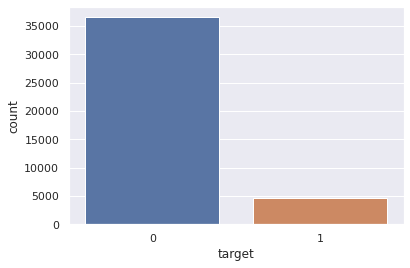

In [ ]:
sns.countplot(data.target)
plt.show()

Evidentemente la variable a predecir esta completamente desbalanceado y sesgado en que a la gran mayoria de los solicitantes por el prestamo se le rechaza la peticion.

Segun la observacion del bloc de notas para el dataset:

(Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model).

Quiero saber cuantos valores son '0' (cero) por si realmente afectaria el  benchmark y usare una mascara.


In [ ]:
data.value_counts(data.duration==0)

duration
False    41184
True         4
dtype: int64

Tan solo hay 4 llamadas que no sean concretado asi que no es afecte en gravedad el estimado benchmark y preferiria no reemplazar los valores faltantes ya que modificaria la variable 'target' y directamente me esta diciendo el bloc de notas que este input debe ser borrado para el momento de modelado.

Habiendo comprobado el ejemplo de nuestro 'target'. Procedo a convertir con mapeos todas las variables binarias unicamente a ceros y unos porque si lo hago con funciones lambdas desaparecen los valores faltantes y no es conveniente... 

Respecto a valores faltantes se tomara una decision de como se reemplazaran una vez que se haya realizado un analisis profundo de correlaciones entre variables y sus distribuciones graficas.

In [7]:
# Cambio valores de la variable 'housing'
data.housing = data.housing.map({'yes': 1 , 'no': 0})
data.value_counts(data.housing)

housing
1.0    21576
0.0    18622
dtype: int64

In [8]:
# Cambio valores de la variable 'loan'
data.loan = data.loan.map({'yes': 1, 'no':0})
data.value_counts(data.loan)

loan
0.0    33950
1.0     6248
dtype: int64

In [9]:
# Cambio de valores de la variable 'default' (credito en mora)
data.default = data.default.map({'yes': 1 , 'no': 0})
data.value_counts(data.default)

default
0.0    32588
1.0        3
dtype: int64

In [ ]:
data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
target               0
dtype: int64

In [ ]:
data.isnull().sum().sum()

12718

Doce mil valiosos datos faltantes por reemplazar...

Teniendo en cuenta que la variable **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
cambiare el nombre de la instancia '999' por 'no fue contactado' y en esta conversion se le aumentaran 15 datos mas que tambien van en 0 veces contactado.

In [ ]:
data.value_counts(data.pdays)

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
dtype: int64

In [10]:
data.pdays = data.pdays.replace({999: 0})
data.value_counts(data.pdays)

pdays
0     39688
3       439
6       412
4       118
9        64
2        61
7        60
12       58
10       52
5        46
13       36
11       28
1        26
15       24
14       20
8        18
16       11
17        8
18        7
19        3
22        3
21        2
20        1
25        1
26        1
27        1
dtype: int64

Ahora se analizan las distribuciones de todas las variables:


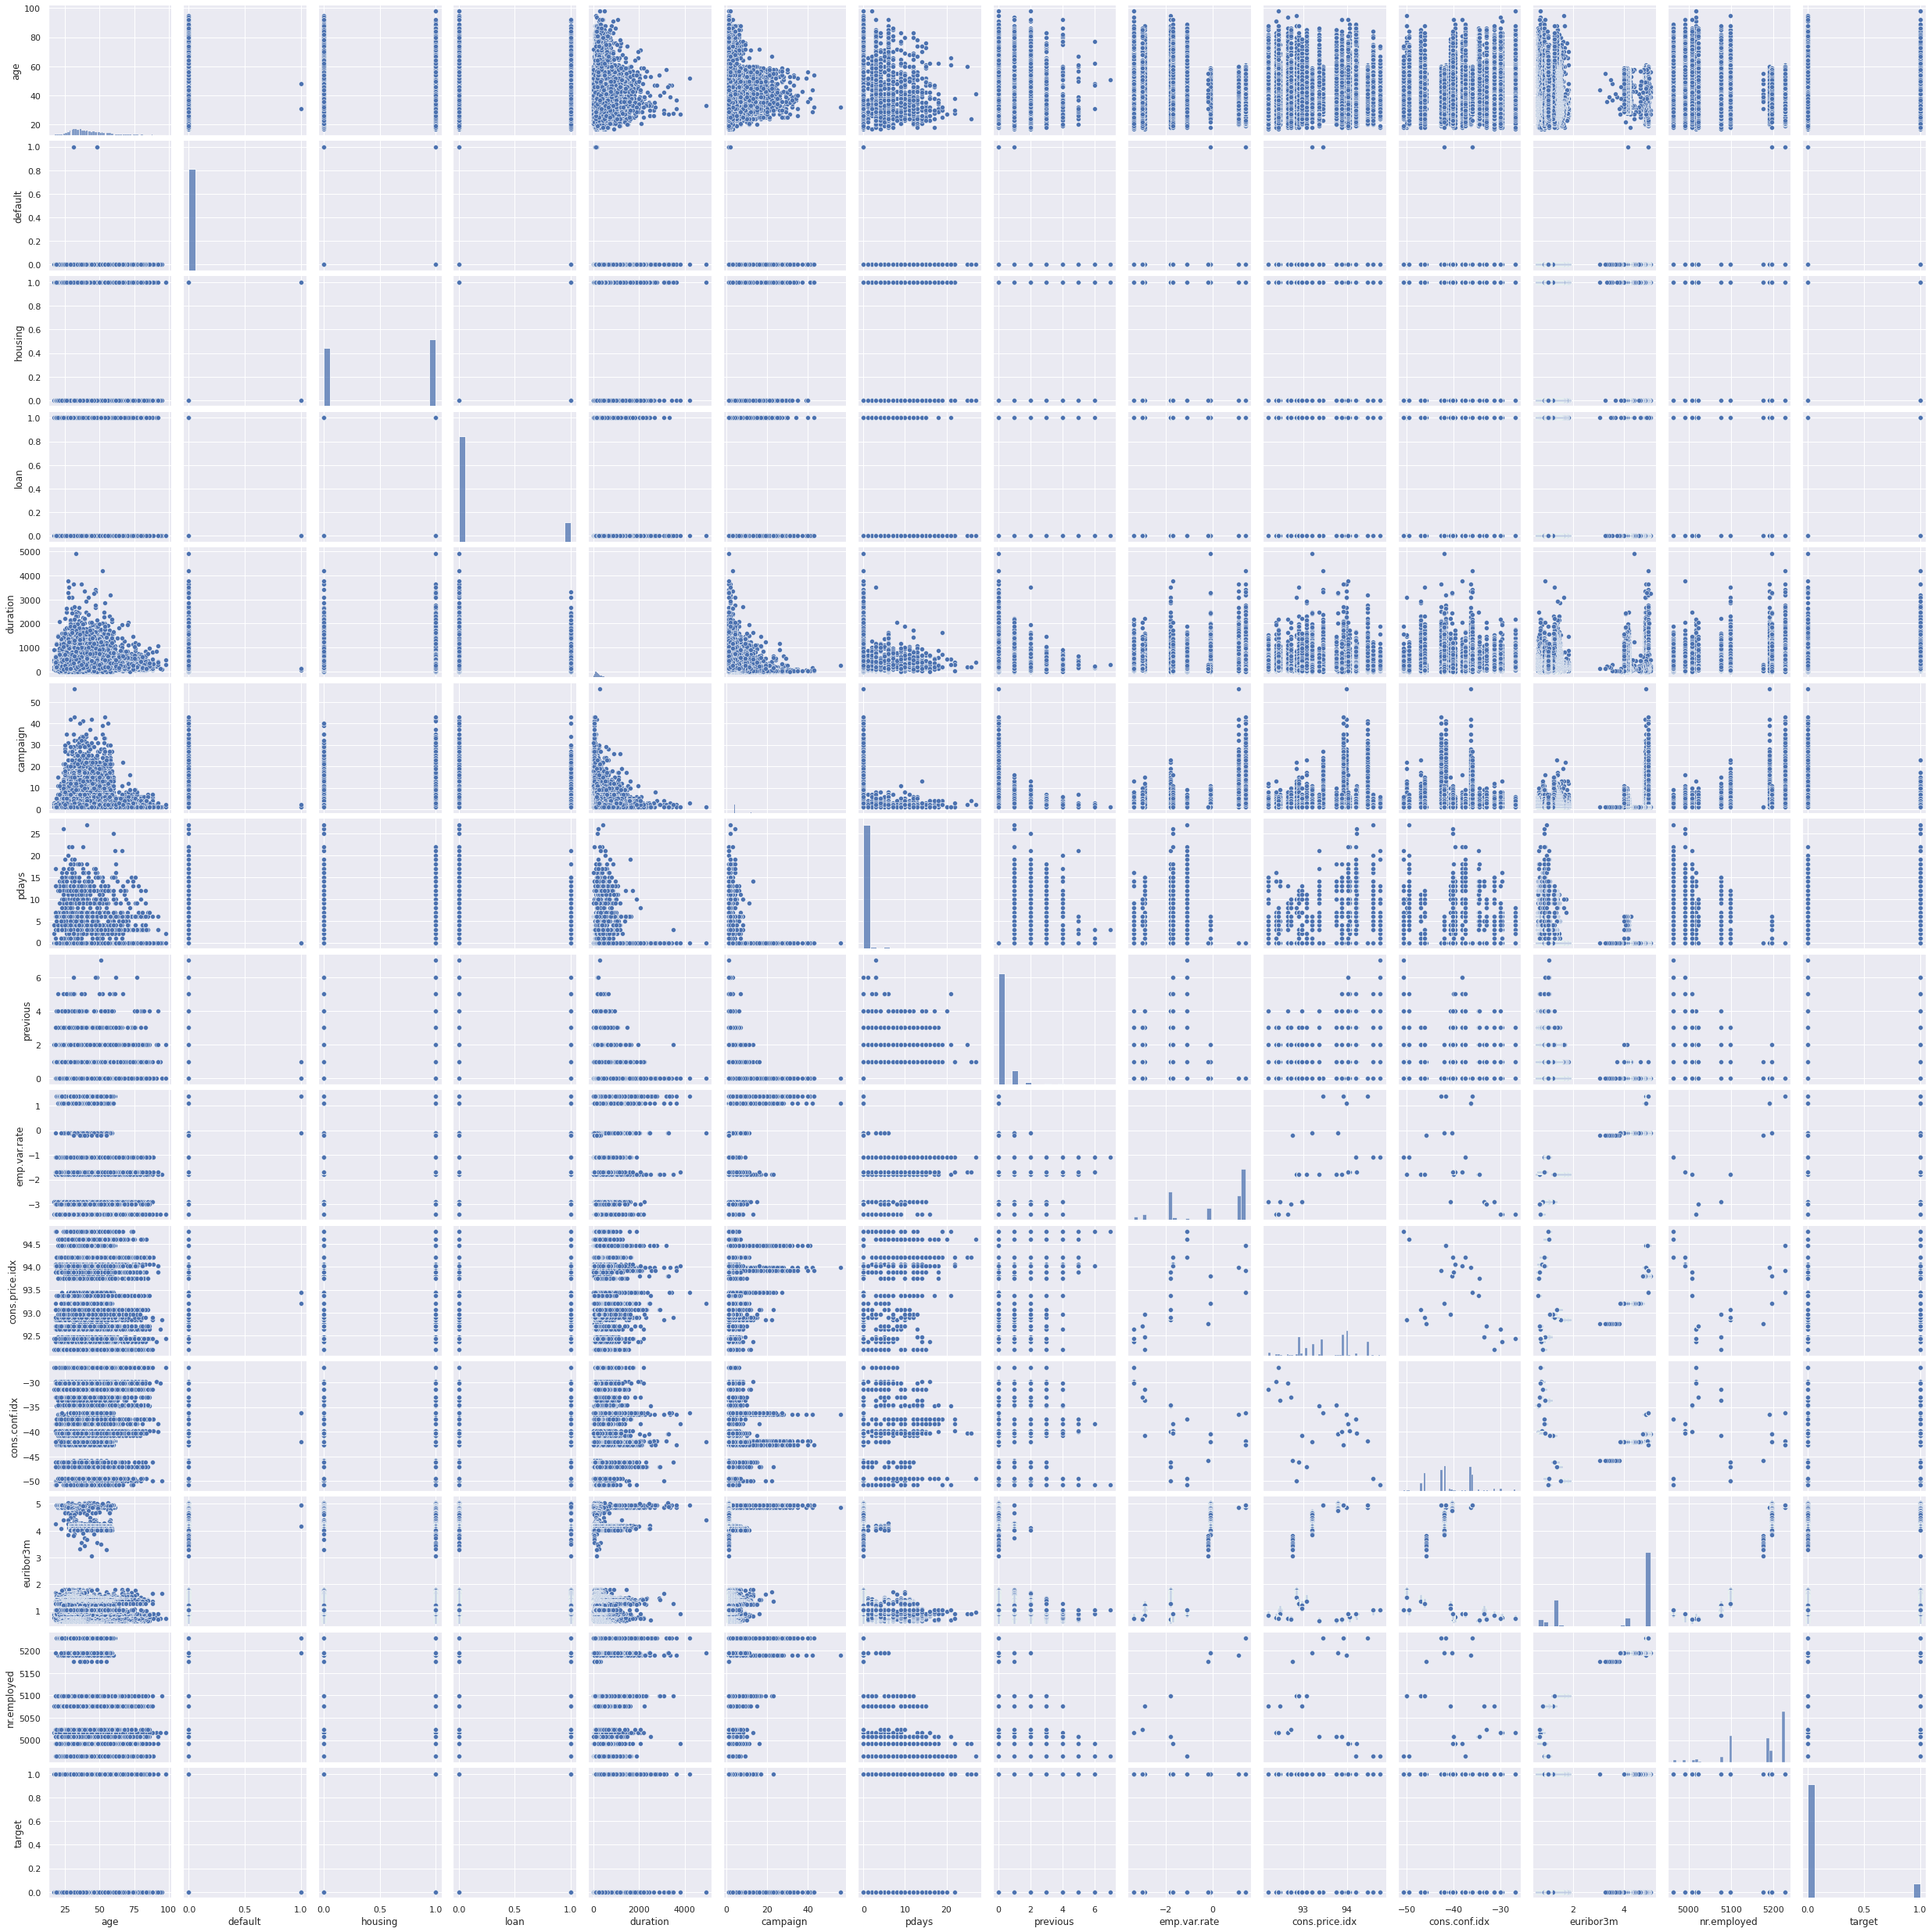

In [ ]:
sns.pairplot(data)
plt.show()

Aparentemente no habria ninguna clase de correlacion entre variables pero ahora aplico un histograma por cada columna de **valor numerico**:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a122764f0>,
      dtype=object)

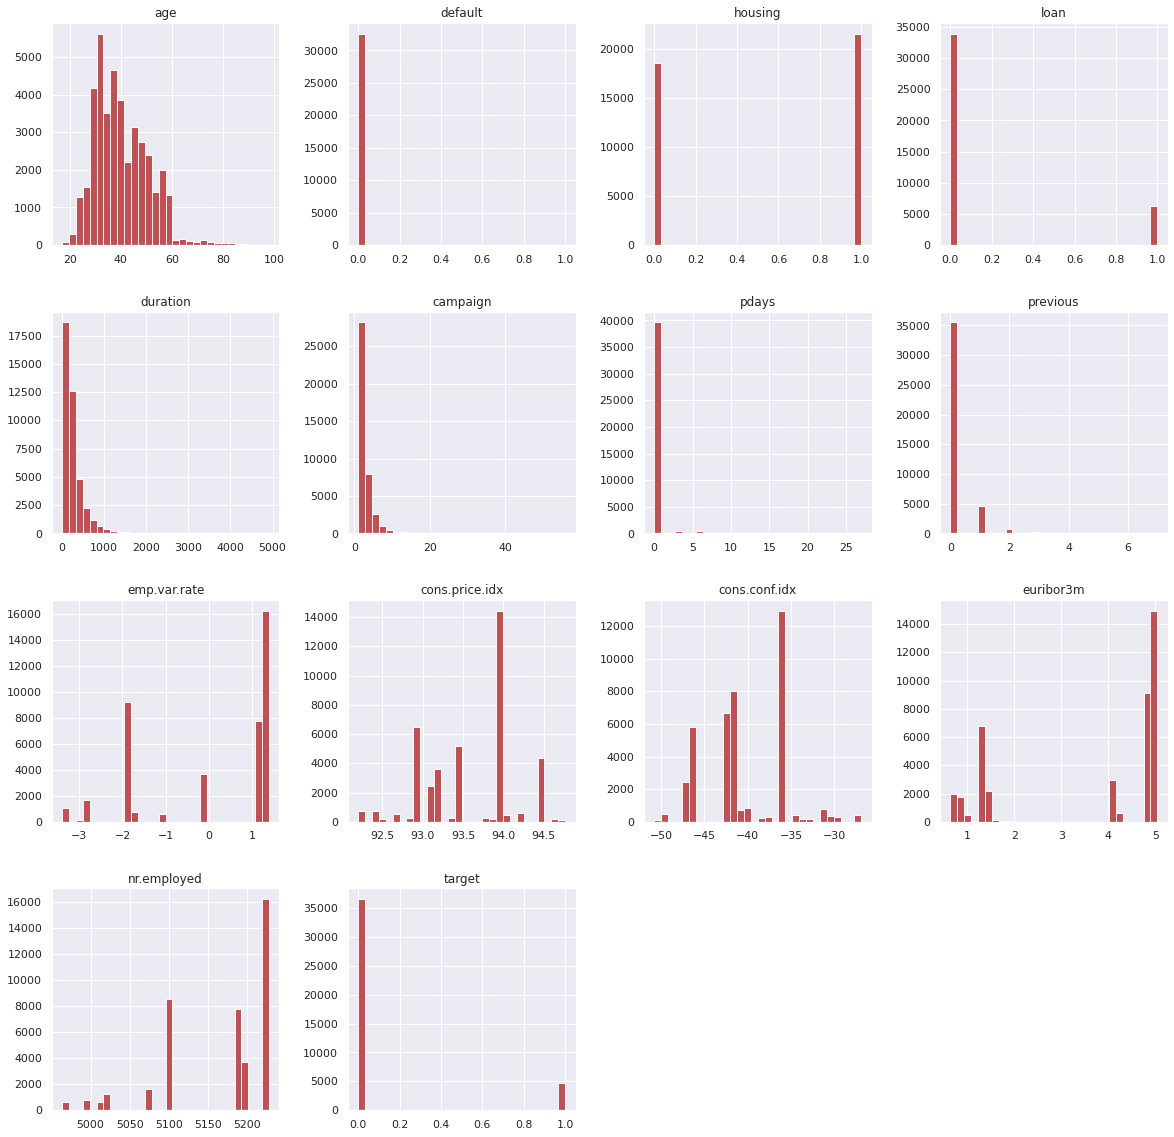

In [ ]:
data.hist( bins = 30 , figsize = (20,20) , color = 'r' )

Con esto podria concluir que las variables univalor no aportan gran comportamiento de sus propios datos en si y se podria tener la consideracion de eliminarse ya que no aportan ningun valor ni informacion de mucha participacion a la hora de evaluar los features tales como: **'pdays'**, **'default'** y **'previous'** (podria considerar la variable **'nr.employed'** porque es info pero que a la vez no aporta nada coherente a la hora de determinar si difiere en que se relice el prestamo y lo mismo para el caso de **'campaign'**). 

Incluso comparando los dos graficos anteriores ninguno presenta una distribucion correlativa ni una distribucion normal de sus datos respectivos. Apenas podria ver que la variable 'age' en el grafico de histogramas muestra un casi comportamiento de distribucion polinomica y en base a esa variable seria interesante realizar los estudios estadisticos en comportamiento con otras columnas.



Me gustaria ver en un estudio de prestamos que se han realizado antes de avanzar:

In [11]:
# Obtengo el dataset de las personas que si reciben el prestamo
prestamo_yes = data[data['target']==1]

In [12]:
prestamo_no = data[data['target']==0]

In [13]:
print('personas que SI reciben el prestamo:' , len(prestamo_yes))
print('personas que NO reciben el prestamo:' , len(prestamo_no))

personas que SI reciben el prestamo: 4640
personas que NO reciben el prestamo: 36548


In [14]:
# Convierto estos valores en porcentajes
pcj_yes = len(prestamo_yes)/len(data) * 100
pcj_no = len(prestamo_no)/len(data) * 100

In [15]:
print( 'porcentaje de las personas que SI reciben el prestamo:' , pcj_yes )
print( 'porcentaje de las personas que NO reciben el prestamo:' , pcj_no )

porcentaje de las personas que SI reciben el prestamo: 11.265417111780131
porcentaje de las personas que NO reciben el prestamo: 88.73458288821988


In [ ]:
# Analizamos los estadisticos de los que fueron aprobados para el prestamo:
prestamo_yes.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,4640.000000,4197.0,4533.000000,4533.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.0
mean,40.913147,0.0,0.553055,0.150673,553.191164,2.051724,1.232328,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991,1.0
std,13.837476,0.0,0.497232,0.357769,401.171871,1.666245,2.943367,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641,0.0
min,17.000000,0.0,0.000000,0.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1.0
25%,31.000000,0.0,0.000000,0.000000,253.000000,1.000000,0.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000,1.0
50%,37.000000,0.0,1.000000,0.000000,449.000000,2.000000,0.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000,1.0
75%,50.000000,0.0,1.000000,0.000000,741.250000,2.000000,0.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000,1.0
max,98.000000,0.0,1.000000,1.000000,4199.000000,23.000000,27.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.0


1. El promedio de edad que es aprobado para el prestamo es de 41 anios y basandonos en solo los promedios, es notable tener el cuenta que este perfil no posee hipoteca, ni prestamos distintos al solicitado, las llamadas han durado casi 10 minutos lo que indica que su duracion es casi una aprobacion, la persona ha sido llamado de 2 - 4 veces y que no pasa mas de 1 dia desde que se contacto por ultima vez para concretar la solicitud a su vez que se tuvo al menos 1 llamada de contacto con este contacto. Tambien es interesante comprender que este perfil no cambia de trabajo constantemente pero que tampoco tiene un constante consumo segun la variable 'const.conf.idx'. Lo mas importante es que este tipo de prospecto ejemplar genera una tasa de Euribor bajo con un promedio de 2% con los grandes bancos e incluso un minimo de 1%.

2. Un caso limite de prestamo es para una persona de casi 100 anios donde genera un 5% de Euribor pero a la vez es un caso muy negativo porque genera una duracion de llamada de casi 69 minutos en total lo que requiere mucho tiempo de busqueda, contacto y reduccion de la productividad para proseguir con mas llamadas aunque es un claro outlier este caso (podria eliminarse).

In [ ]:
# Analizamos los estadisticos de los que fueron aprobados para el prestamo:
prestamo_no.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,36548.000000,28394.000000,35665.000000,35665.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.0
mean,39.911185,0.000106,0.534670,0.156035,220.844807,2.633085,0.092864,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600,0.0
std,9.898132,0.010279,0.498804,0.362894,207.096293,2.873438,0.896951,0.409199,1.482932,0.558993,4.391155,1.638187,64.571979,0.0
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.0
25%,32.000000,0.000000,0.000000,0.000000,95.000000,1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000,0.0
50%,38.000000,0.000000,1.000000,0.000000,163.500000,2.000000,0.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5195.800000,0.0
75%,47.000000,0.000000,1.000000,0.000000,279.000000,3.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000,0.0
max,95.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,22.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.0


1. Para el caso de los que no reciben el prestamo (segun la tabla), al parecer se les tiene en cuenta que posean la caracteristica de moroso (por lo que se ve en 'default') aunque es una muy pequenia exclusion pero en proporcion a la gran cantidad de rechazados se puede decir que si afecta y tambien que este perfil tenga una caractistica de inestabilidad laboral porque aca se puede ver que hay un valor de promedio positivo en la variable 'emp.var.rate' y que estas tendencias ocasionan que tengan un porcentaje de Euribor por 4% lo que genera mas perdida.

2. Se podria deducir que la duracion de la llamada sirve como opcion de descarte segun la disposicion del prospecto y comparando entre quienes si son aprobados y los que no, un estimado de llamado con duracion de 1 minuto y 20 sgs puede ser suficiente para que el telemarketer entienda a criterio rapido si es aprobable o no.

Antes de eliminar las variables anteriores quiero comprender con un mapa de calor que no haya alguna correlacion que difiera alguna variable con otra:

In [ ]:
 correlaciones = data.corr()

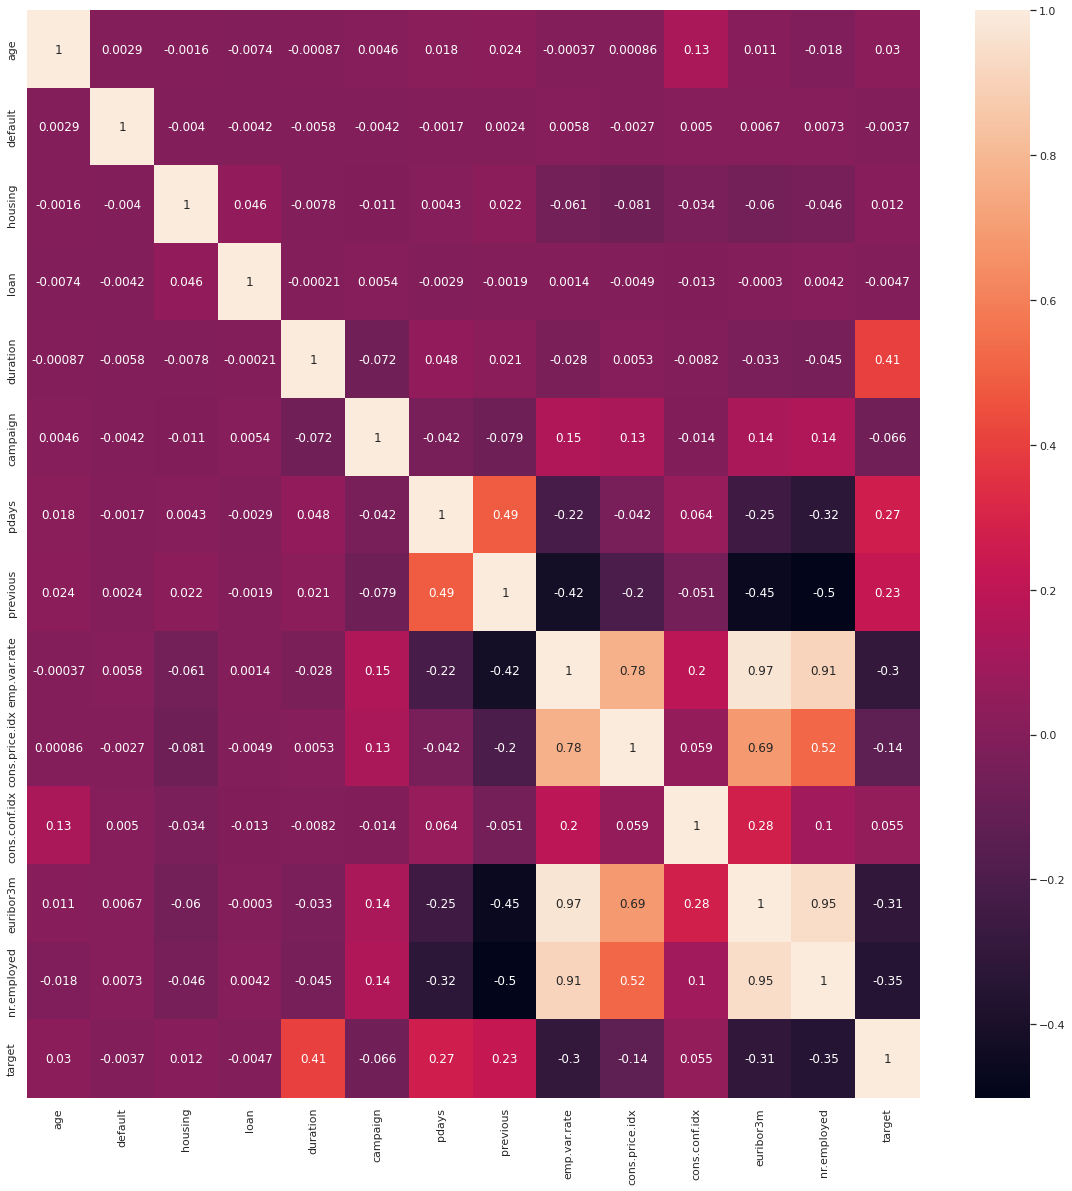

In [ ]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlaciones , annot = True)

Este mapa de calor nos dice cosas bastante interesantes que no se pudieron ver a simple vista con graficos de puntos ni histogramas:

1.  Columnas 'pdays', 'campaign', 'previous', default, cons.conf.idx, se eliminan directamente por su baja participacion correlativa a nula.

2.   Variables 'nr.employed' y 'emp.var.rate' poseen 91% de correlacion y se podria deducir que las empresas mas grandes tienen mas cambios de personal y/o rotaciones internas lo cual daria a entender que preparan mas a los empleados para estar mas preparados en sus sectores y generar un analisis constante de euribor (pero eso pensando el porque de la siguiente correlacion a mencionar) o que simplemente hay despidos o renuncias. 

3.   Estadisticamente hablando para que las variables sean consideradas con una fuerte correlacion deben tener un minimo de 95% de inherencia entre si y habiendo dicho esto, es el caso de las variables 'nr.employed' y 'euribor3m' asi que esto hace cambiar planes en borrar la 'nr.employed'. Se podria considerar que esta correlacion dice que la tasa de interes entre bancos afecta por la cantidad de empleados contratados, osea que los bancos con mayor infraestructura generan mas interes. Aparte que ambas variables trimestralmente tienen fuertes impactos en sus respectivas empresas.

4.  Aca esta la correlacion mas fuerte de todas donde 'euribor3m' esta unido con 'emp.var.rate' con 97% y con esto me atreveria de decir con certeza que la tasa de interes bancaria esta condicionada con la rotacion, cambio y/o despido de personal porque si es en cuestion de contratacion, se exige mas pago. Otra opcion es que al contratarse mas personal se requiere compensar el pago con alguna ganancia al incrementar la tasa o en la hipotetica situacion de despido/recorte buscan compensar la falta de productividad por al aumentar los interese pero la opcion que mas puede tener sentido es que en la grafica de histograma, la variable 'nr.employed' tiene una fuerte acumulacion llegando a los 160 mil empleados y diria que entre mas empleados, mas interes cobra dicho banco.

5.  Variable 'duration' no aporta nada al dataset en general asi que solo se tomara en cuenta para el benchmark pero despues se eliminara.

6.  Columnas 'pdays', 'cons.price.idx', 'campaign', 'previous', default, se elimina directamente tambien.

7. Como ultima opcion seria revisar en conjunto con negocio las variables para despejar confusiones en cuanto a la eliminacion de variables.



**Se analizara las distribuciones de las variables categoricas edades, estados maritales, tipo de empleo y educacion respecto a la aprobacion de los creditos**


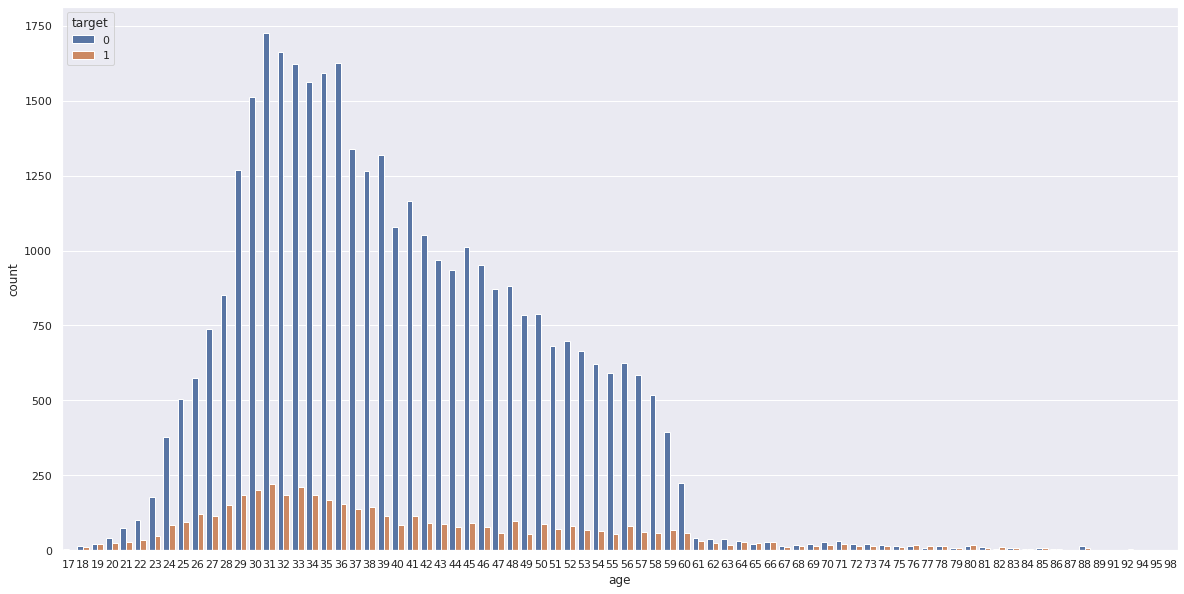

In [ ]:
plt.figure( figsize = [20,10] )
sns.countplot( x = 'age' , hue = 'target' , data = data )

Hay una leve distribucion normal lo cual podria aplicarse una eliminacion de outliers usando el z-score al ser polinomica pensando en la depuracion de los datos.

La edad de los prestamos tanto aprobados como rechazados estan entre 30 y 31 anios.

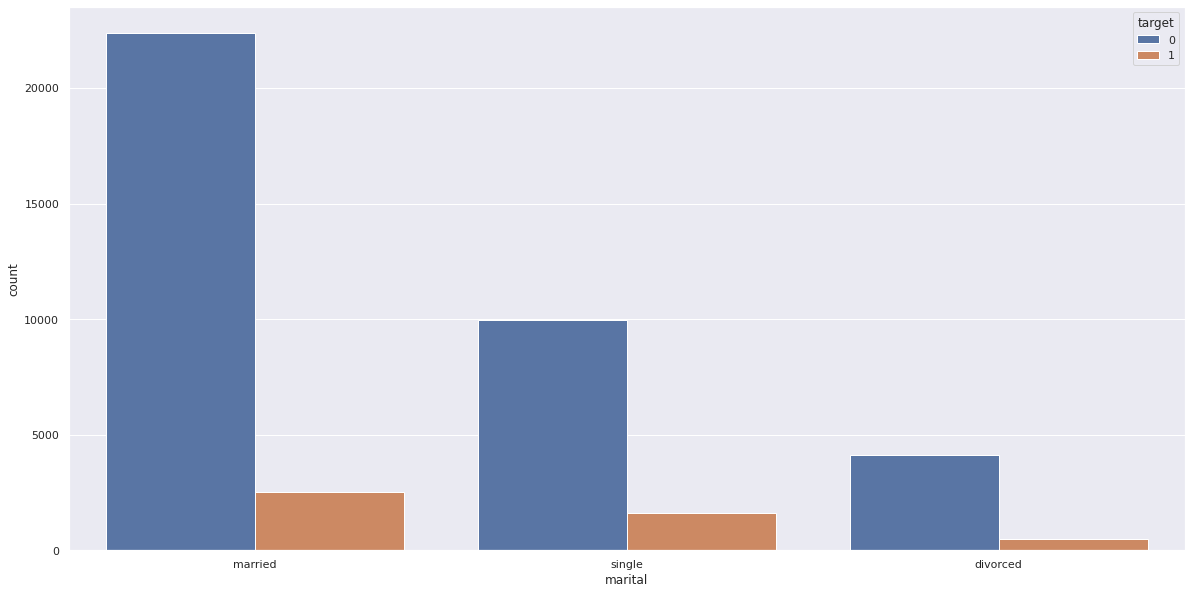

In [ ]:
plt.figure( figsize = [20,10] )
sns.countplot( x = 'marital' , hue = 'target' , data = data )

En esta tabla es interesante lo que se puede ver y que hay una tasa pequenia de que se rechacen los prestamos para las personas solteras en comparacion con los casados y los divorciados. Esto tiene coherencia al momento de ser evaluados ya que la persona al estar soltera no tiene otros gastos que puedan ser una posibilidad de morosidad.

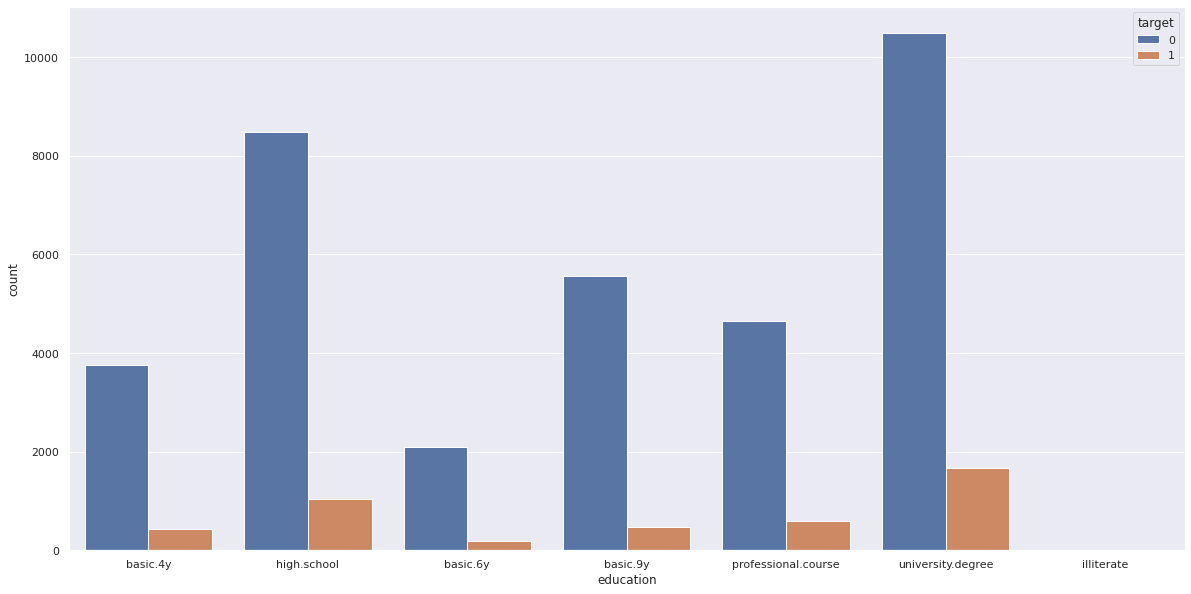

In [ ]:
plt.figure( figsize = [20,10] )
sns.countplot( x = 'education' , hue = 'target' , data = data)

Hay una disparidad de aprobaciones en cuanto a licenciados, segundo lugar quienes terminaron el secundario y de tercer lugar con mayor aprobacion quienes realizaron cursos profesionales que lo mas seguro son areas de IT y por sus rentables pagos pueden solicitar dichos creditos.

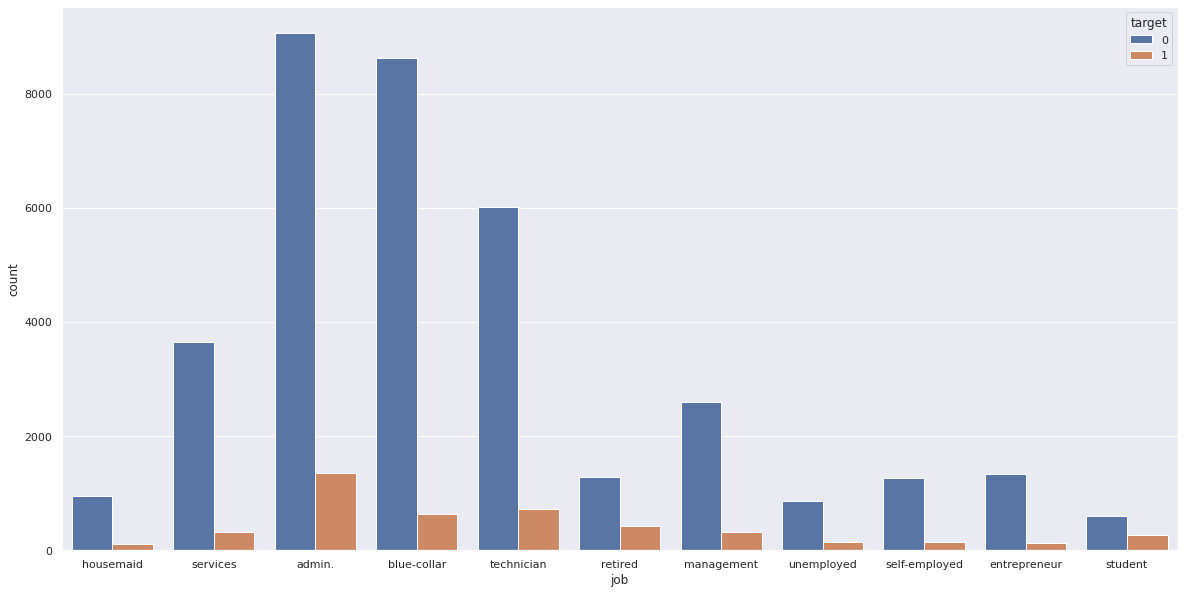

In [ ]:
plt.figure( figsize = [20,10] )
sns.countplot( x = 'job' ,  hue = 'target' , data = data )

Es bueno saber que las personas que menos rechazan son los tecnicos y jubilados en comparasion con blue-collar e incluso admin. Se podria validar con este grafico que las personas que hayan hecho cursos profesionales serian los tecnicos y que son los mejores prospectos para otorgar creditos.

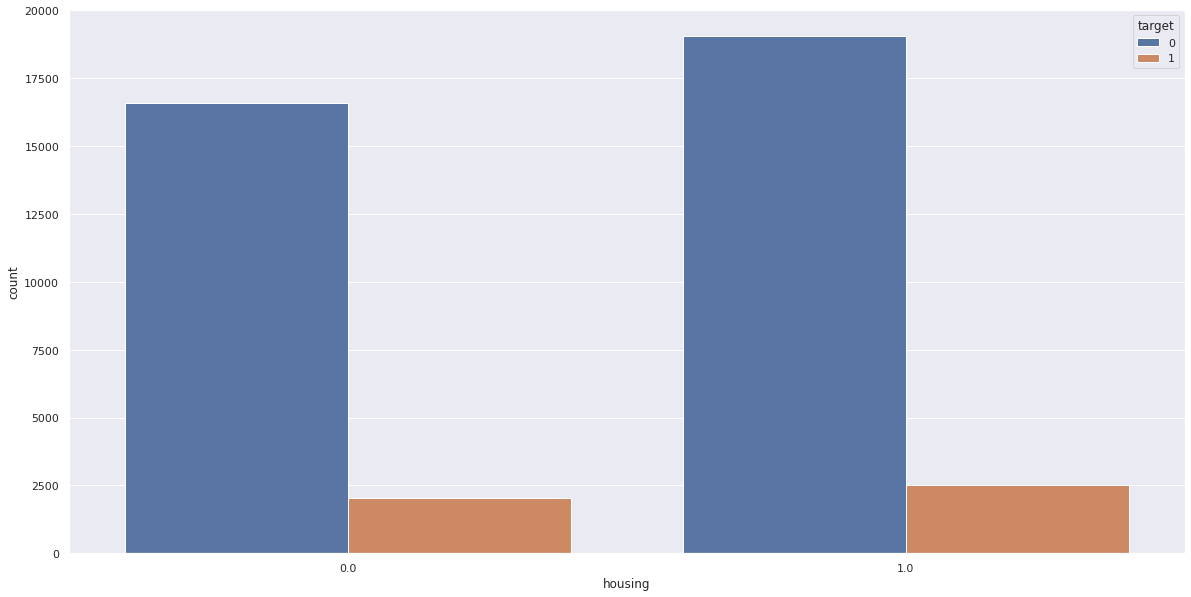

In [ ]:
plt.figure( figsize = [20 , 10] )
sns.countplot( x = 'housing' , hue = 'target' , data = data )

Esta visualizacion indica que no es necesariamente exluyente posea o no una hipoteca para recibir un prestamo pero si la mayoria que tenia una se le rechazo la peticion.

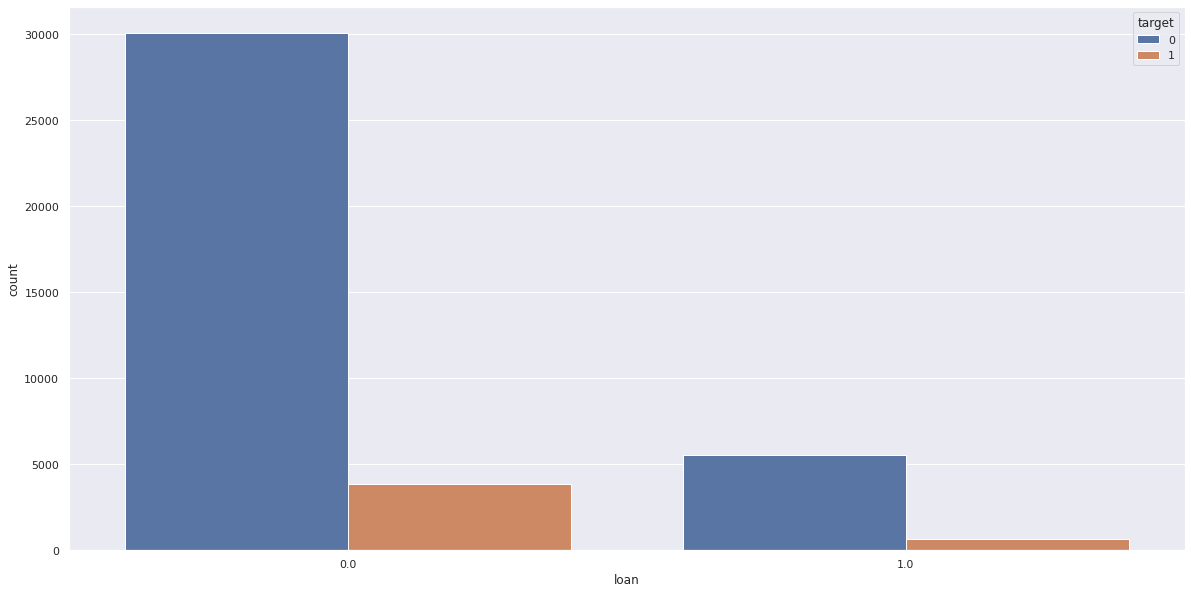

In [ ]:
plt.figure( figsize = [20 , 10] )
sns.countplot( x = 'loan' ,  hue = 'target' , data = data)

Esta grafica sorprende demasiado porque la mayoria de personas que no peseen otro prestamo se les denego el credito...Esto me indica completamente que la varia 'default' y 'euribor3m' son las piezas claves para determinar si se realiza el prestamo o no. 

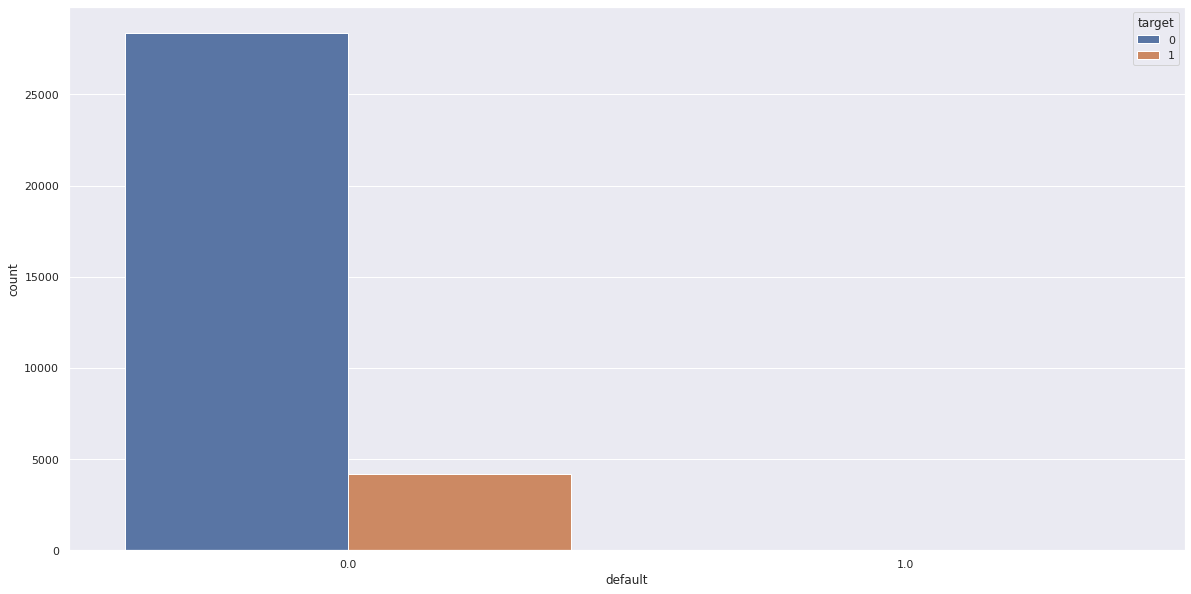

In [ ]:
plt.figure( figsize = [20,10] )
sns.countplot( x = data['default'] , hue = 'target' , data = data )

Esta variable tiene sentido siendo unicamente muy pocas las veces que se les presto dinero a personas morosas.

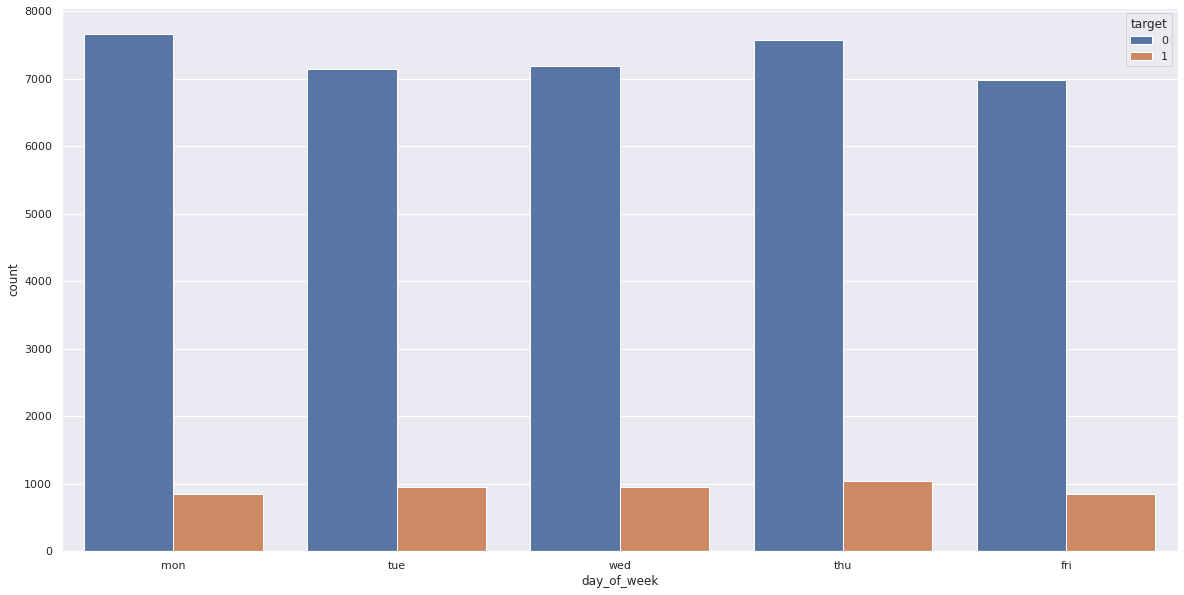

In [ ]:
plt.figure( figsize = [20,10] )
sns.countplot( x = data['day_of_week'] , hue = 'target' , data = data )

Los martes, miercoles y jueves son los dias que mas se aprueban los prestamos, osea con un perfil mas ideal se toman en esos dias.

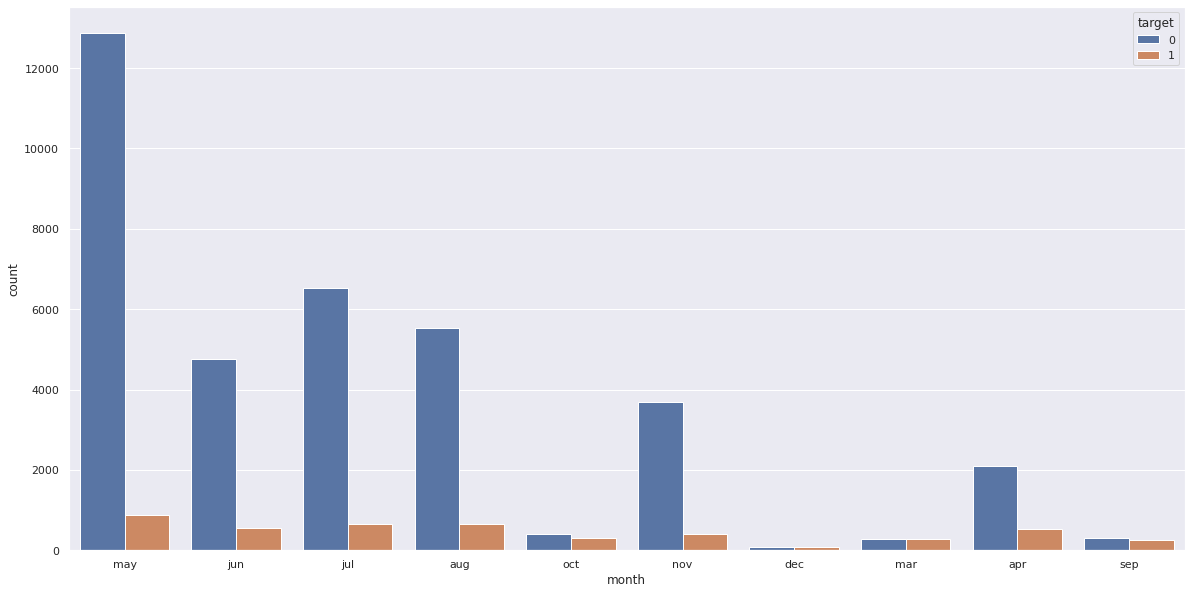

In [ ]:
plt.figure( figsize = [20,10] )
sns.countplot( x = data['month'] , hue = 'target' , data = data )

En proporcion a las solicitudes rechazas con las aprobaciones, se diria que Agosto es el mejor mes con abril.

**Visualizacion de variables numericas continuas**

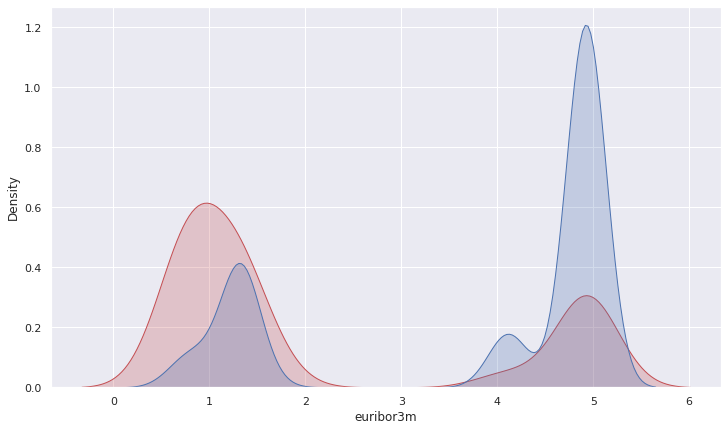

In [ ]:
plt.figure( figsize = [12,7] )
sns.kdeplot(prestamo_yes['euribor3m'], label = 'Prospectos aprobados', shade = True , color = 'r' )
sns.kdeplot(prestamo_no['euribor3m'], label = 'Prospectos rechazados' , shade = True , color = 'b' )

Aca se observa una distribucion bimodal donde hay una gran cantidad de desbalance donde se levantan intereses entre bancos 5% a quienes se les niega el prestamos y un 1% a quienes se les puede generar el prestamo pero tambien se les nego el prestamo a algunos aspirantes que tenian un bajo cobro de interes y en sentido inverso a quienes se les genero el prestamo (vendria a ser algo como falsos positivos y falsos negativos) pero esto se puede dar por la morosidad a quienes se les nego o que no fueron contactados, o que tienen un empleo inestable. 

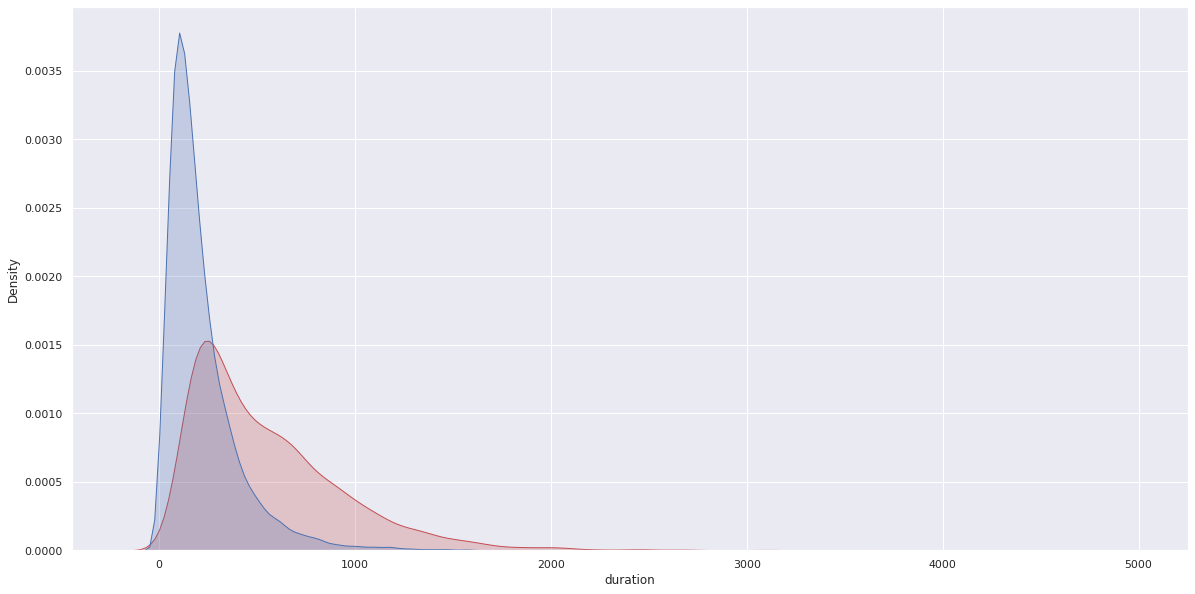

In [ ]:
plt.figure( figsize = [20 , 10] )
sns.kdeplot( prestamo_yes['duration'] , shade = True , color = 'r')
sns.kdeplot( prestamo_no['duration'] , shade = True , color = 'b' )

Se nota que la negativa del credito es por la poca duracion de las llamadas y tambien de que obviamente no se contactaron y que al menos las llamadas con mas o menos una duracion entre 3-4 min es una oportunidad de encontrar un perfil ideal para generar el prestamo. Tiene un ligero comportamiento distribuido normalmente.

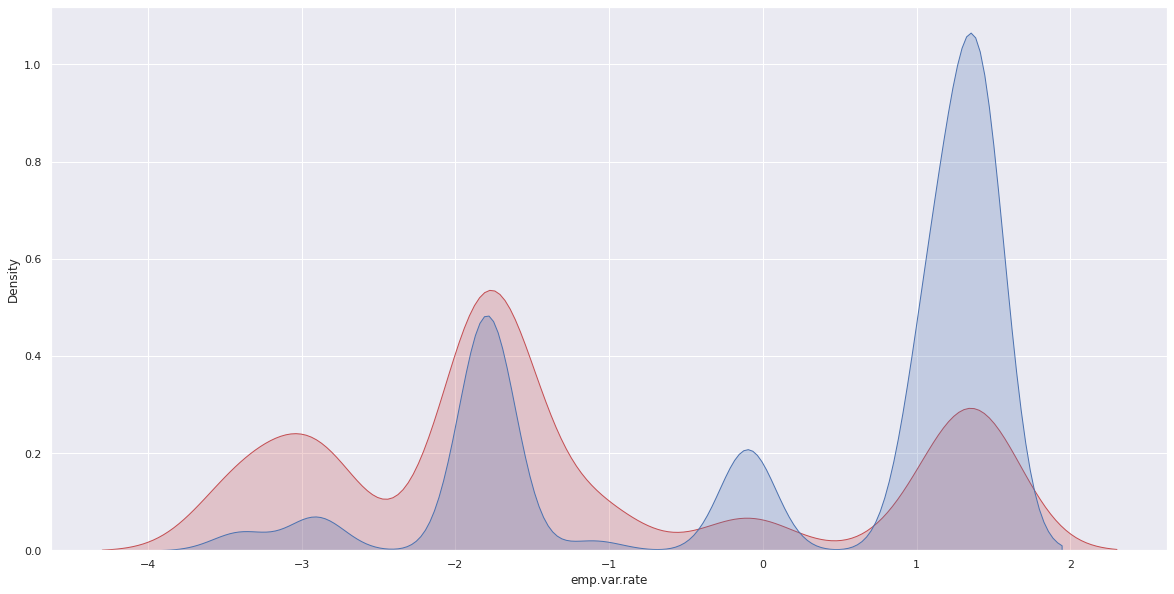

In [ ]:
plt.figure( figsize = [20 , 10] )
sns.kdeplot( prestamo_yes['emp.var.rate'] , shade = True , color = 'r')
sns.kdeplot( prestamo_no['emp.var.rate'] , shade = True , color = 'b' )

Este grafico es mas explicativo de que los prestamos se realizan a personas que no hayan cambiado de empleo en um plazo de 6 - 9 meses ya que esta variable ofrece informacion trimestral considerando que el valor de 1 o 100 sea igual a 3 meses donde hay valores de -3, -4 y -2, osea 9 meses, 1 anio y 6 meses. Existe la aprobacion de prestamos en cambio laboral de 3 meses a 5 meses.

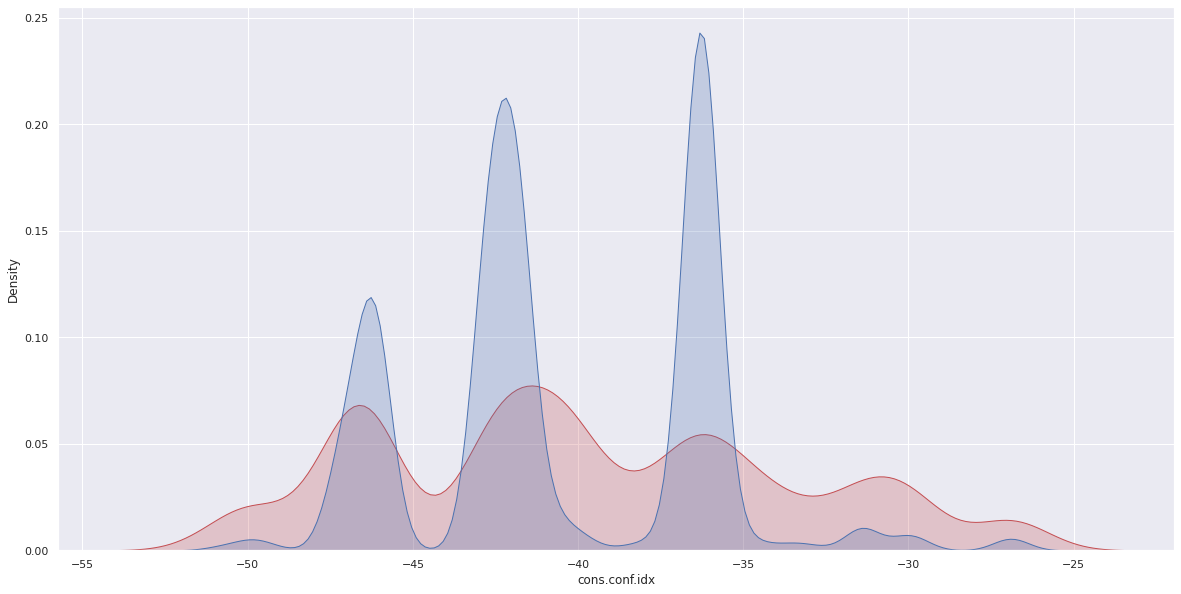

In [ ]:
plt.figure( figsize = [20 , 10] )
sns.kdeplot( prestamo_yes['cons.conf.idx'] , shade = True , color = 'r')
sns.kdeplot( prestamo_no['cons.conf.idx'] , shade = True , color = 'b' )

Sinceramente la variable de indice de confianza al consumidor esta calculada entre las exoectativas de inflacion y su comportamiento, es decir quienes posiblemente no se queden en mora con las cuotas, se refleja una pequenia tendencia polinomica a quienes si se les aprobo el credito con una comparativa entre -50 y -30.

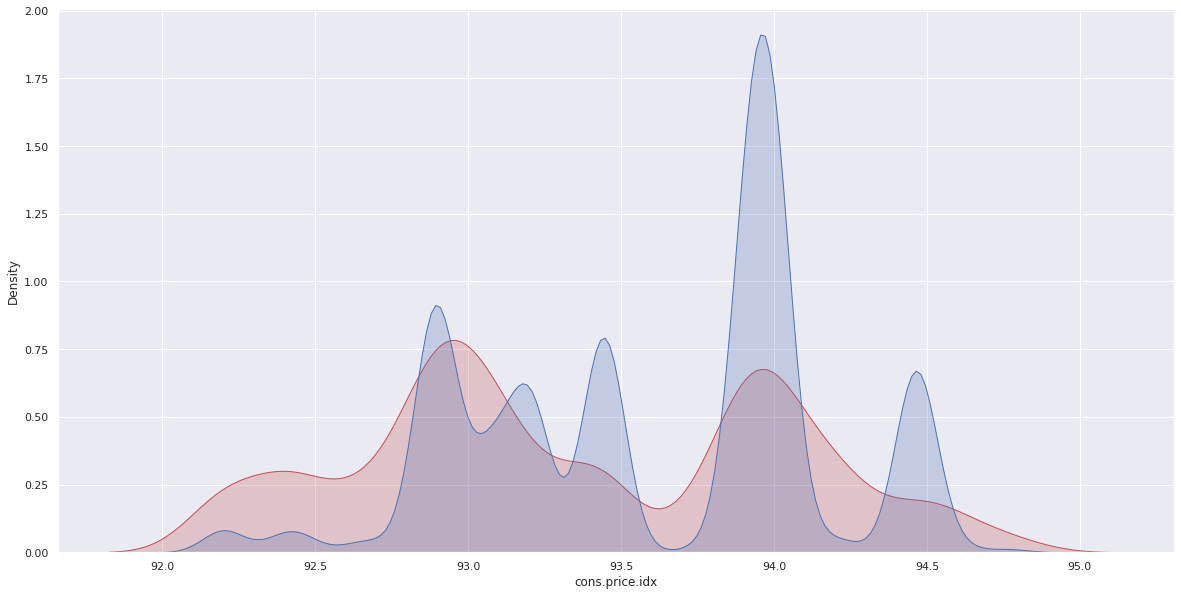

In [ ]:
plt.figure( figsize = [20 , 10] )
sns.kdeplot( prestamo_yes['cons.price.idx'] , shade = True , color = 'r' )
sns.kdeplot( prestamo_no['cons.price.idx'] , shade = True , color = 'b' )

En esta grafica se puede ver el monto de la solicitud del prestamo que mas se solicitan.

Vemos que la mayoria de personas que no califican piden hasta 94 mil Euros y despues tenemos de segundo lugar por 92 min con 8 Euros.

Al menos los prestamos se realizan de manera equilibrada y balanceada en cuanto a los montos con una tendencia polinomica pero sin ser grandes cantidades sesgadas.

**Ahora quiero analizar algunas graficas de comportamiento en base a la correlacion de 'euribor3m' y 'emp.var.rate'** 

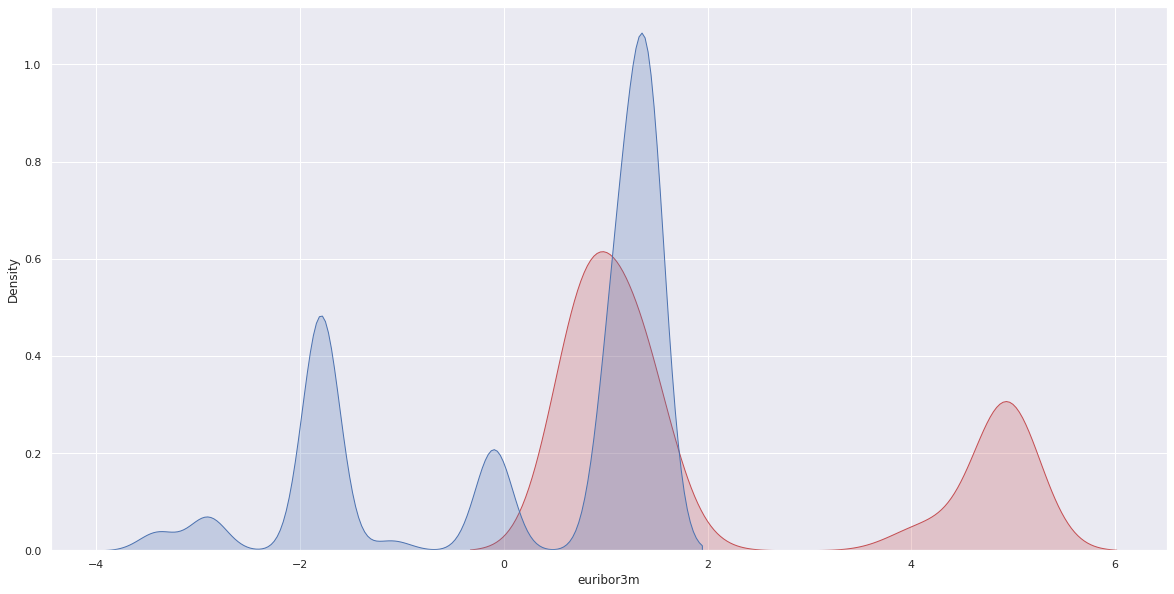

In [ ]:
plt.figure( figsize = [20 , 10] )
sns.kdeplot( prestamo_yes['euribor3m'] , shade = True , color = 'r' )
sns.kdeplot( prestamo_no['emp.var.rate'] , shade = True , color = 'b' )

Se ve que hubo un rechazo a la mayoria de solicitantes que cambiaba de trabajo. 

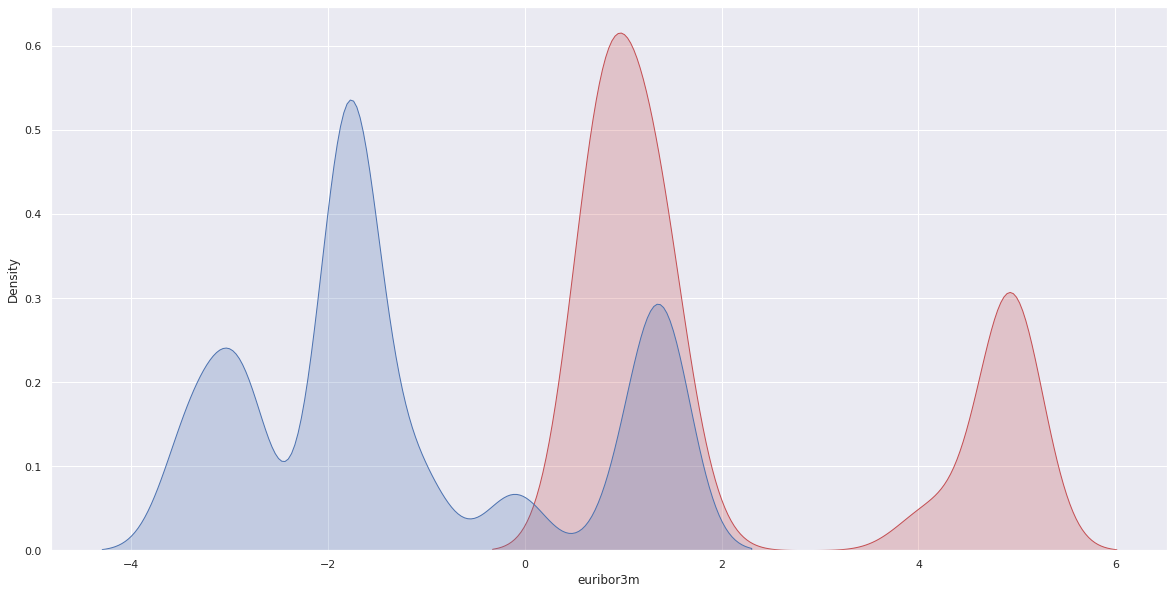

In [ ]:
plt.figure( figsize = [20 , 10] )
sns.kdeplot( prestamo_yes['euribor3m'] , shade = True , color = 'r' )
sns.kdeplot( prestamo_yes['emp.var.rate'] , shade = True , color = 'b' )

Los prestamos aprobados fueron dados en su mayoria a quienes no habian cambiado de trabajo en 6 meses y con un interes para el banco entre 0% y 2% con algunas excepciones de interes 4% y 6%. En comparacion a la imagen anterior se comprende que un pequenio grupo de personas que cambiaron de empleo al menos 1 vez se les otorgo el credito.

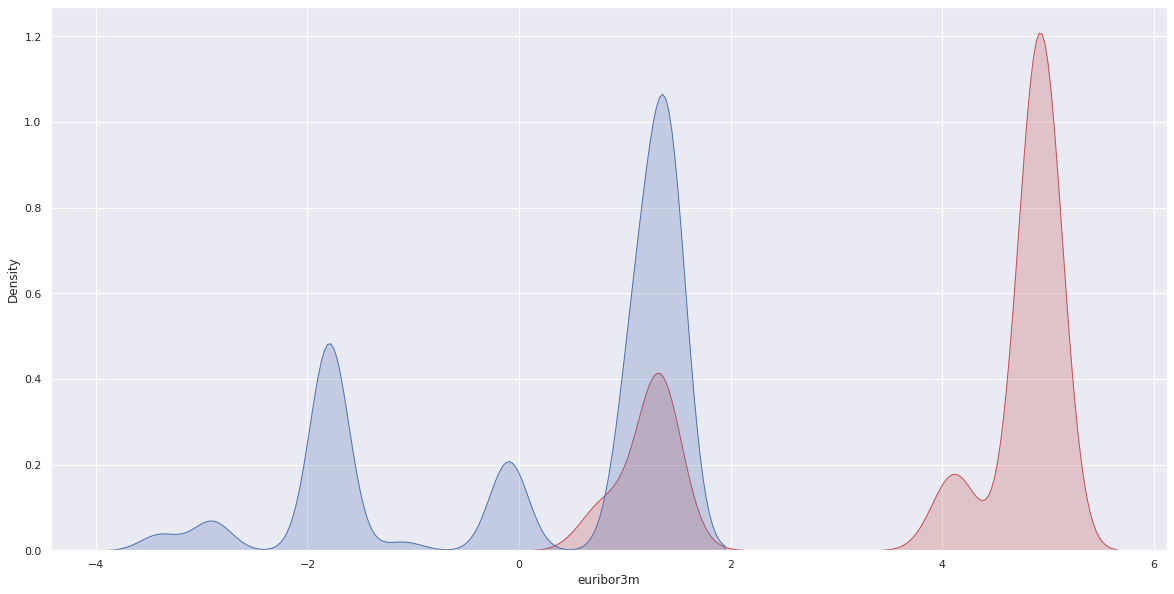

In [ ]:
plt.figure( figsize = [20 , 10] )
sns.kdeplot( prestamo_no['euribor3m'] , shade = True , color = 'r' )
sns.kdeplot( prestamo_no['emp.var.rate'] , shade = True , color = 'b' )

Definitivamente se rechazaron prospectos que genereaban una tasa de interes interbancaria bastante alta desde el 3,5% al 5,5% con una comparativa de donde la gran mayoria cambio de trabajo minimo 1 vez cada 3 meses o en los ultimos 3 meses.    

**Analizando Outliers**


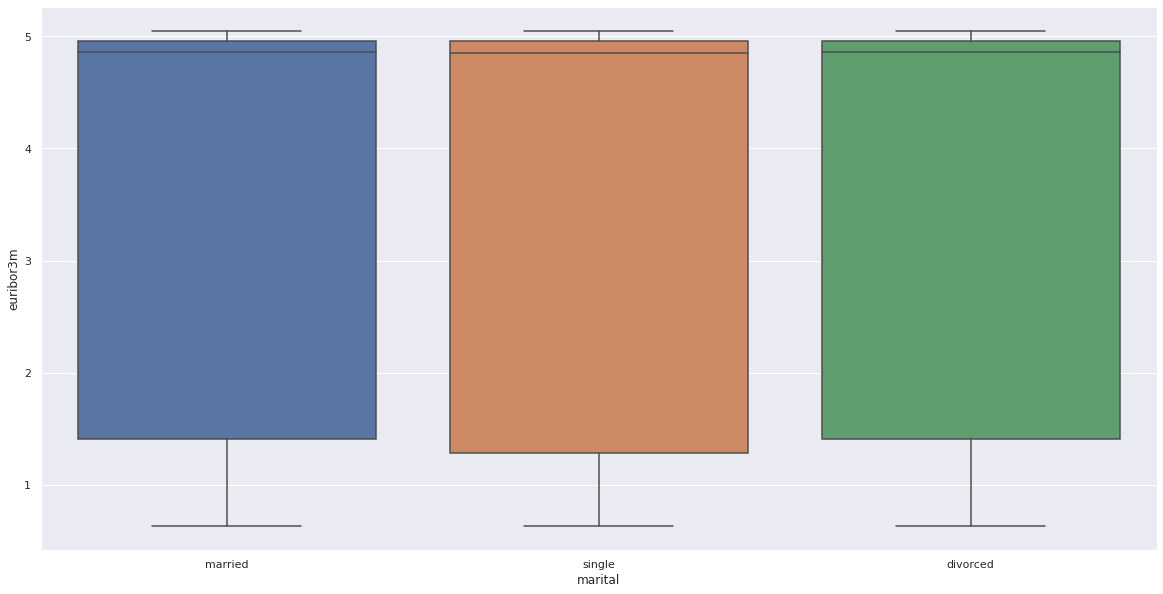

In [ ]:
plt.figure( figsize = [20,10] )
sns.boxplot( x = 'marital' , y = 'euribor3m' , data = data )

Aca se comprueba que los solteros pueden generar menos euribor por su 1er quantile mas alineado con 1.

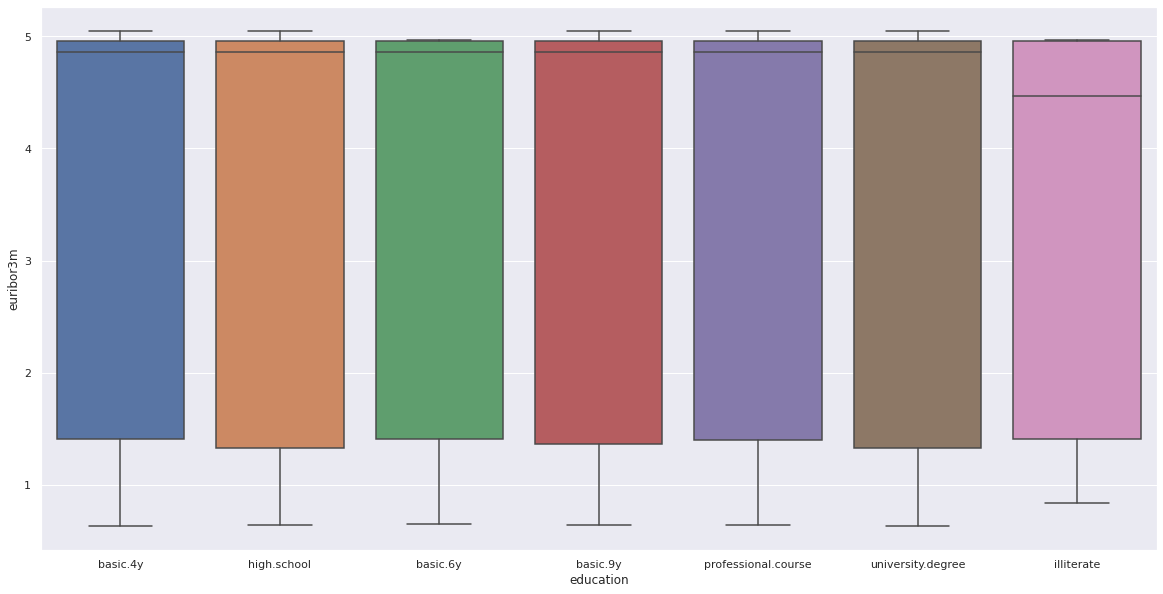

In [ ]:
plt.figure( figsize = [20,10] )
sns.boxplot( x = 'education' , y = 'euribor3m' , data = data )

Los universitarios pueden llegar a tener los minimos de euribor mas pequenios que otro pero puede ser que sea porque son recien graduados del high school y lo mismo ocurre en el boxplot del high school. Tambien los que son analfabetas poseen una media mas chica que todos.

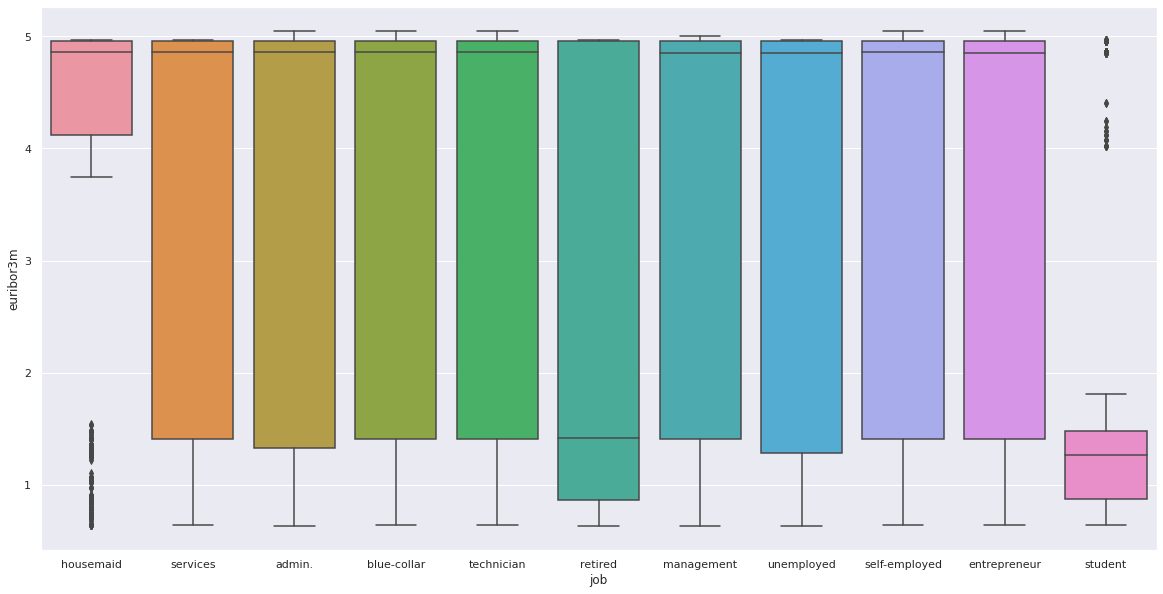

In [ ]:
plt.figure( figsize = [20,10] )
sns.boxplot( x = 'job' , y = 'euribor3m' , data = data )

La tabla que indica que:

1. Los jubilados son los mejores prospectos en genreal para aprobar prestamos por su promedio de euribor mas baja que todas las categorias lo que indica ganancia.

2. Hay raros casos de outliers para estudiantes y eso podria decir que muy pocos recibieron posibles prestamos sin ser un perfil ideal a aprobarse lo que se puede deducir que son posibles amigos o conocidos de trabajadores del banco o la otra opcion es que sean padres/madres que hayan abierto cuentas con los datos de sus hijos para recibir menos intere, o que no hayan sido aprobados e.t.c.

3. A las ama de llaves se les estima un interes demasiado alto y hasta se puede considerar algo clasista. Muy pocas tienen un bajo interes y tal vez sea porque algun agente les colaboro con esa gestion.

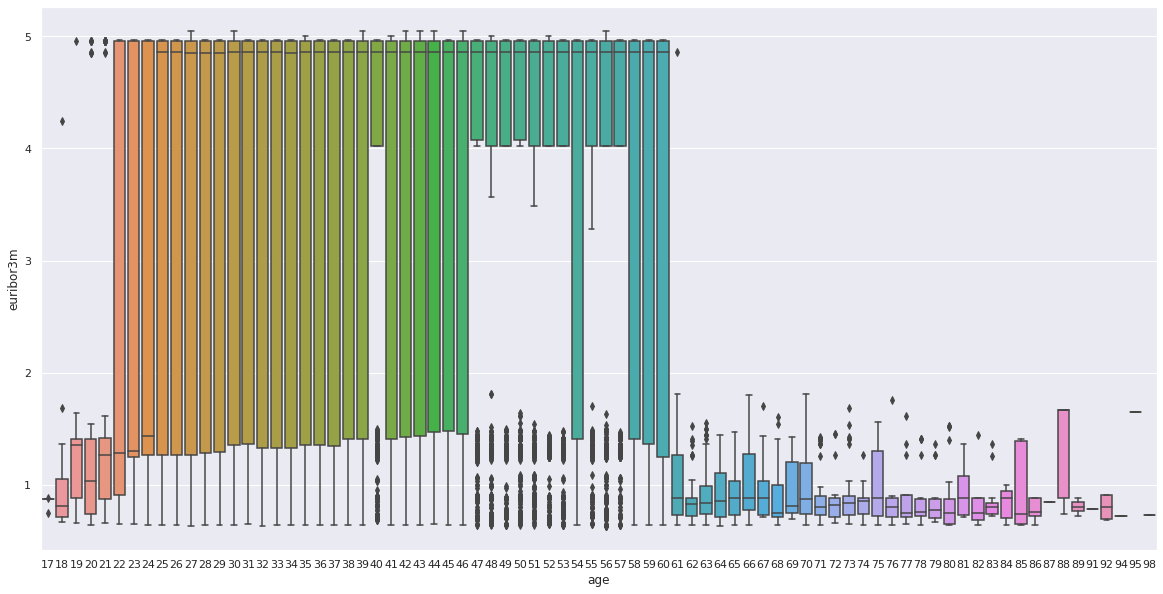

In [ ]:
plt.figure( figsize = [20,10] )
sns.boxplot( x = 'age' , y = 'euribor3m' , data = data )

Este grafico esta en relacion con empleos que se vio anteriormente.

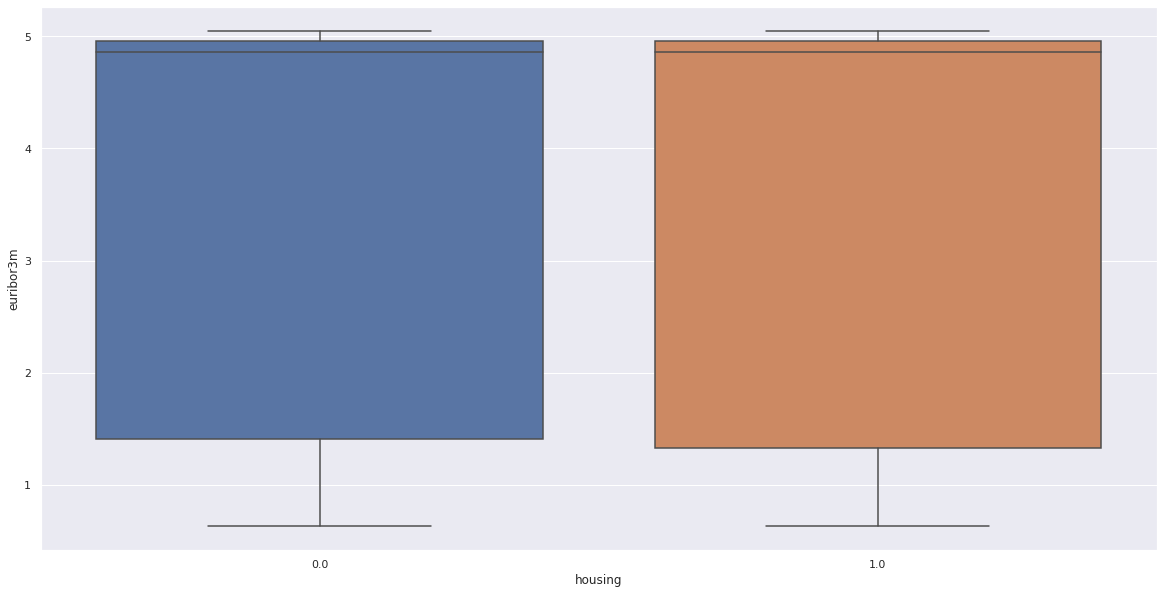

In [ ]:
plt.figure( figsize = [20,10] )
sns.boxplot( x = 'housing' , y = 'euribor3m' , data = data )

al parecer quienes posean hipotecas no difieren en el prestamo aunque para los que se aprueban el credito es porque no aumenta mucho su interes acorde el quantile 25% de los aprobados.

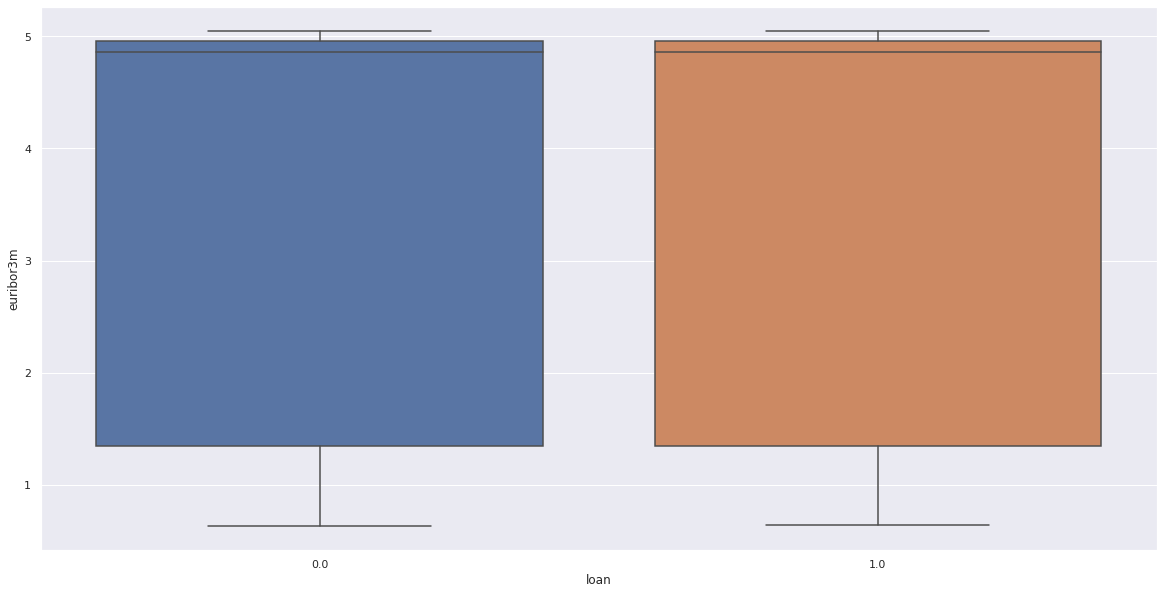

In [ ]:
plt.figure( figsize = [20,10] )
sns.boxplot( x = 'loan' , y = 'euribor3m' , data = data )

Claramente no afecta en quienes posean prestamos personales en la solicitud ni en la media misma como en las hipotecas.

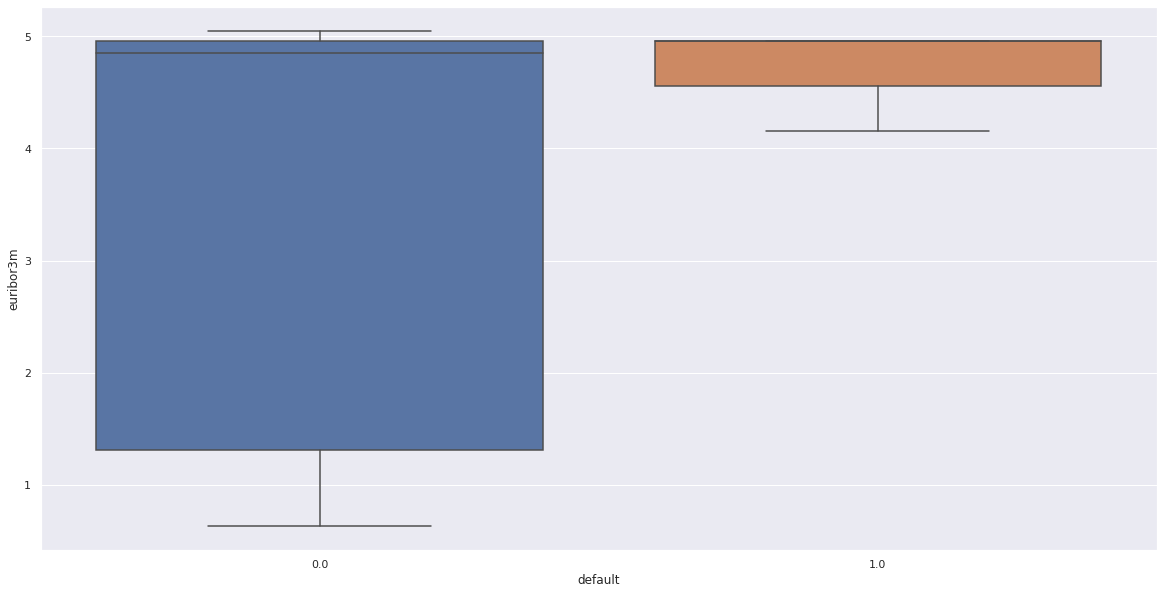

In [ ]:
plt.figure( figsize = [20,10] )
sns.boxplot( x = 'default' , y = 'euribor3m' , data = data )

Este grafico explica curiosamente lo que es la media demasiado alta para quienes fueron aprobados respecto al interes pero la amplia diferencia es debido a las edades de los solicitantes que son los que generan fuerte impacto.

**Valores Faltantes**

Teniendo en cuenta que solo las variables categoricas son las que tienen valores faltantes entonces se transforman los valores de esas categoricas no binarias a numeros usando de nuevo mapeo para poder reemplazar los nulos por la moda de los mismos porque estadisticamente es lo correcto para categorias.

Antes de ralizar lo mencionado, prefiero entender el porque de esos valores faltantes o si es por solo una casualidad, o porque dependen de una variable con otra para determinar el tipo de imputacion.

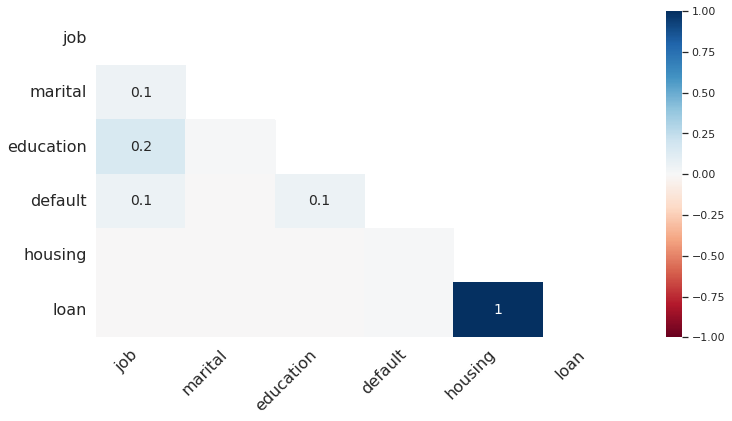

In [ ]:
import missingno as msno
msno.heatmap( data , figsize = (12,6) )

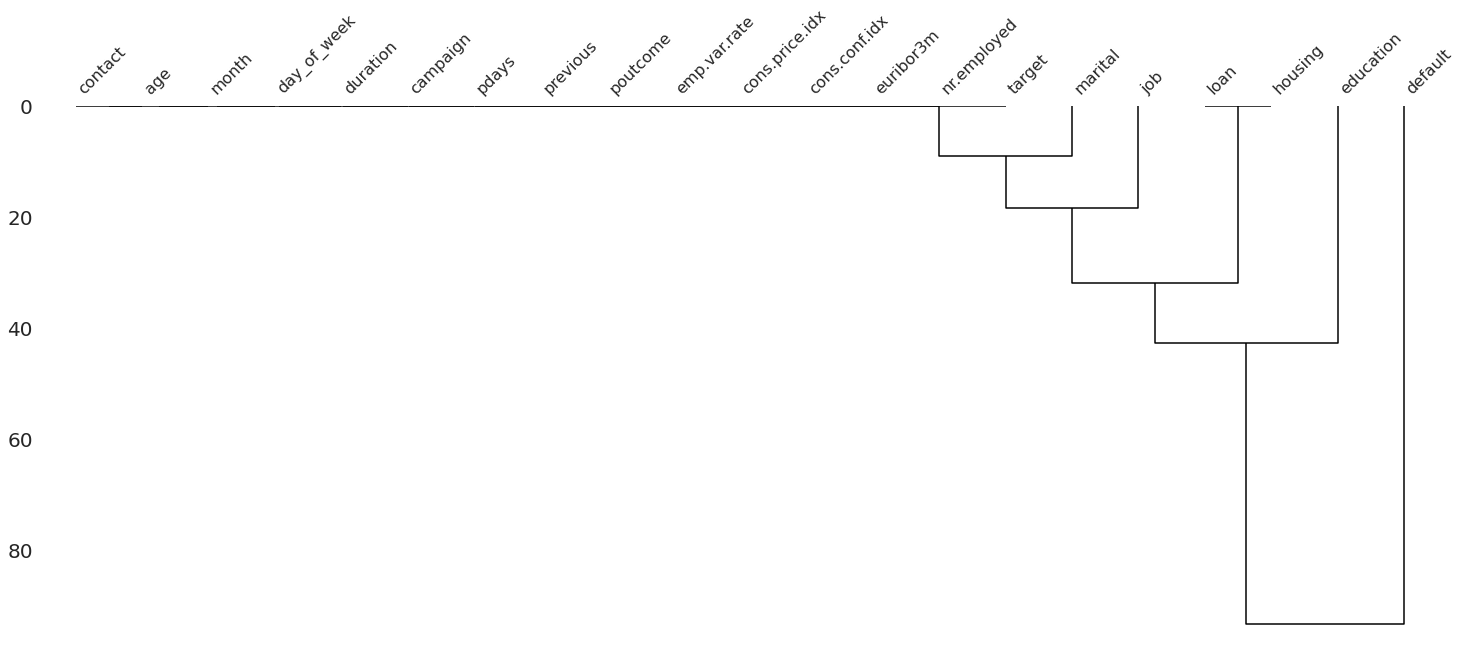

In [ ]:
msno.dendrogram(data)

Se concluye que:

1. La usencia de datos entre 'loan' y 'housing' esta completamente relacionada lo que indica que su completado depende del resultado de la otra, es decir que si la persona no posee un prestamo personal, no tiene morosidad y es logico esto.

2. la ausencia entre 'education' y 'job' es levemente correlacional y da a entender que si no hablan de su estado educativo, no dicen su trabajo lo cual seria por una posible verguenza.

3. Si no hablan del trabajo, no se puede saber si es moroso pero en baja proporcion.

4. No mencionan su trabajo por no compartir su estado sentimental? o al reves....pero es curioso...

Se reemplazaran las siguientes variables por sus modas:

In [ ]:
# Moda de la columna 'job'
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [16]:
# Mapeo y reemplazo de valores faltantes para 'job'
data.job = data.job.fillna('admin.')
data.job = data.job.map({'admin.': 1, 'blue-collar': 2 , 'entrepreneur': 3, 'housemaid': 4, 'management': 5 , 'retired': 6, 'self-employed': 7, 'services': 8, 'student': 9, 'technician': 10, 'unemployed': 11})

In [ ]:
# Moda de la columna 'marital'
data.marital.value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

In [17]:
# Mapeo y reemplazo de valores faltantes para 'marital'
data.marital = data.marital.fillna('married')
data.marital = data.marital.map({'single': 1, 'married': 2 , 'divorced': 3})

In [ ]:
# Moda de la columna 'education'
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [18]:
# Mapeo y reemplazo de valores faltantes para 'education'
data.education = data.education.fillna('university.degree')
data.education = data.education.map({'basic.4y': 1, 'basic.6y': 2 , 'basic.9y': 3, 'high.school': 4, 'illiterate': 5 , 'professional.course': 6, 'university.degree': 7,})

In [19]:
# Mapeo para 'month'
data.month = data.month.map({'jan': 1, 'feb': 2 , 'mar': 3, 'apr': 4, 'may': 5 , 'jun': 6, 'jul': 7 , 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})

In [20]:
# Mapeo para 'day_of_week'
data.day_of_week = data.day_of_week.map({'mon': 1, 'tue': 2 , 'wed': 3, 'thu': 4, 'fri': 5})

In [21]:
# Mapeo para 'poutcome'
data.poutcome = data.poutcome.map({'failure': 1, 'nonexistent': 2 , 'success': 3})

In [22]:
# Mapeo para 'contact'
data.contact = data.contact.map({'cellular': 1, 'telephone': 2})

Se reemplazaran los valores faltantes de 'housing' por el valor de la siguiente instancia y como se relaciona con 'loan', 'loan' sera completado con los mismos valores reemplazados en 'housing'.

In [23]:
# Reemplazo por valor contiguo para 'housing'

data.housing = data.housing.fillna( method = 'bfill' )

# Reemplazo para 'loan' por el valor dado en 'housing'

data.loan = data.loan.fillna( method = 'ffill' )

Para 'default' se reemplazaran los faltantes por valores de la siguiente instancia de la columna misma porque no es un factor que determine de una manera logica con las variables 'housing' y 'loan' ni con 'euribor3m'.

In [24]:
data.default = data.default.fillna( method = 'bfill' )

In [25]:
# Se comprueba que los cambios hayan sido correctamente generados

data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64

In [26]:
# Visualizacion de muestras aleatorias del dataset

data.sample(60)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
32690,27,1,1,7,0.0,0.0,0.0,1,5,1,...,1,1,1,3,-1.8,92.893,-46.2,1.299,5099.1,0
35606,29,1,2,7,0.0,1.0,0.0,1,5,1,...,1,0,0,2,-1.8,92.893,-46.2,1.244,5099.1,1
35277,31,7,3,3,0.0,1.0,0.0,1,5,5,...,10,0,1,1,-1.8,92.893,-46.2,1.250,5099.1,0
1056,44,1,2,4,0.0,0.0,0.0,2,5,3,...,3,0,0,2,1.1,93.994,-36.4,4.856,5191.0,0
1431,35,8,1,1,0.0,0.0,1.0,2,5,4,...,3,0,0,2,1.1,93.994,-36.4,4.855,5191.0,0
40963,54,7,2,7,0.0,1.0,0.0,1,10,4,...,4,0,1,1,-1.1,94.601,-49.5,0.987,4963.6,0
37446,42,10,2,6,0.0,1.0,0.0,1,8,3,...,1,0,0,2,-2.9,92.201,-31.4,0.879,5076.2,0
20135,47,1,2,7,0.0,0.0,0.0,1,8,1,...,1,0,0,2,1.4,93.444,-36.1,4.965,5228.1,0
861,42,2,2,2,0.0,0.0,0.0,2,5,3,...,1,0,0,2,1.1,93.994,-36.4,4.856,5191.0,0
35583,57,10,3,2,0.0,1.0,0.0,1,5,1,...,4,0,0,2,-1.8,92.893,-46.2,1.244,5099.1,0


...Una rapida visualizacion de outliers...

In [ ]:
# Separo todas las variables originalmente numericas en el dataset 

col_num = ['age' , 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

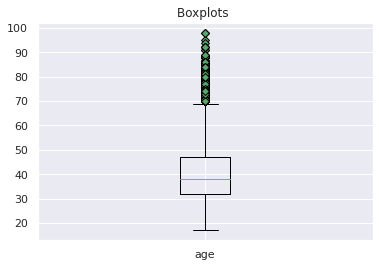

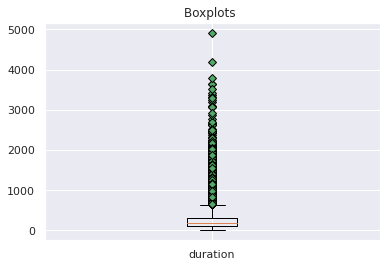

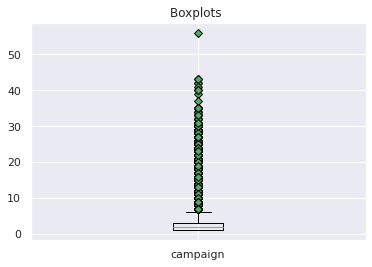

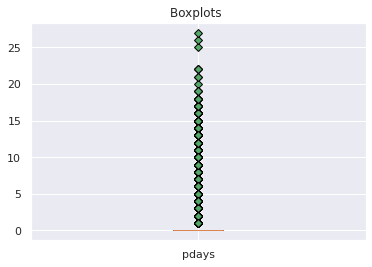

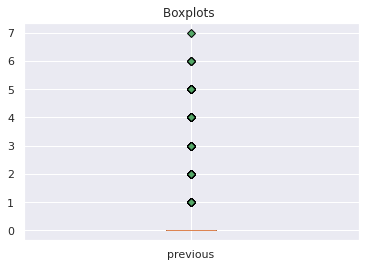

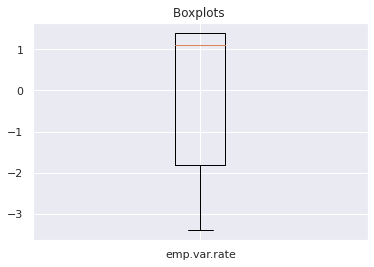

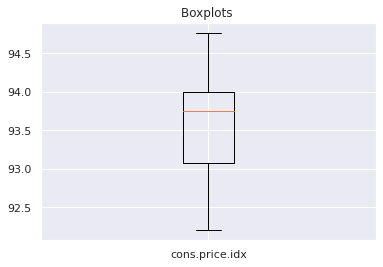

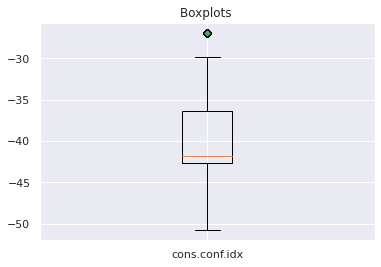

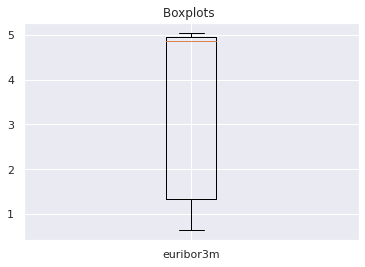

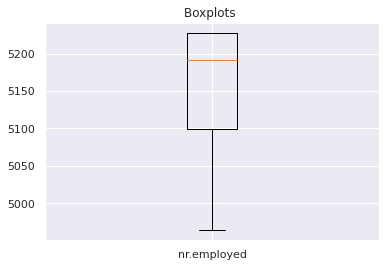

In [ ]:
green_diamond = dict(markerfacecolor='g', marker='D')
for c in col_num:
  fig, ax = plt.subplots ()
  ax.set_title( 'Boxplots ')
  ax.boxplot(data[c], flierprops=green_diamond, labels=[c])

Se podria dar fe que en este dataset no se cuenta con valores atipicos que sea muy influyentes en realmente y tal vez serian los casos que se visualizaron en cuanto 'age'/'euribor3m' y 'job'/'euribor3m' pero nada mas...

Para resolver cualquier duda se realizara una revision utilizando un algoritmo de aprendizaje no supervisado de Clustering para encontrar algun patron de acumulacion de puntos en todo el conjunto de datos y los que esten fuera de ese patron seran considerados valores atipicos y ser eliminados para no sesgar ni complejizar el proceso de modelado con la ayuda de PCA.

Se empezara normalizando todo el dataset con :

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:

scaler = MinMaxScaler()

data_norm = scaler.fit_transform(data)

data_norm

array([[0.48148148, 0.3       , 0.5       , ..., 0.95737928, 0.85973535,
        0.        ],
       [0.49382716, 0.7       , 0.5       , ..., 0.95737928, 0.85973535,
        0.        ],
       [0.24691358, 0.7       , 0.5       , ..., 0.95737928, 0.85973535,
        0.        ],
       ...,
       [0.48148148, 0.5       , 0.5       , ..., 0.08932215, 0.        ,
        0.        ],
       [0.33333333, 0.9       , 0.5       , ..., 0.08932215, 0.        ,
        1.        ],
       [0.7037037 , 0.5       , 0.5       , ..., 0.08932215, 0.        ,
        0.        ]])

In [ ]:
# Importo la libreria y entreno el dataset
from sklearn.cluster import KMeans

In [ ]:
# Busqueda optima de clusters aunque ya se sabe que son 2 por la variable 'target'
# Calculando similitud de individuos

wcss = []
for i in range (1, 11):
  kmeans = KMeans(n_clusters = i, max_iter = 300)
  kmeans.fit(data_norm)  # Aplico K-means a la base de datos
  wcss.append (kmeans. inertia_)
  

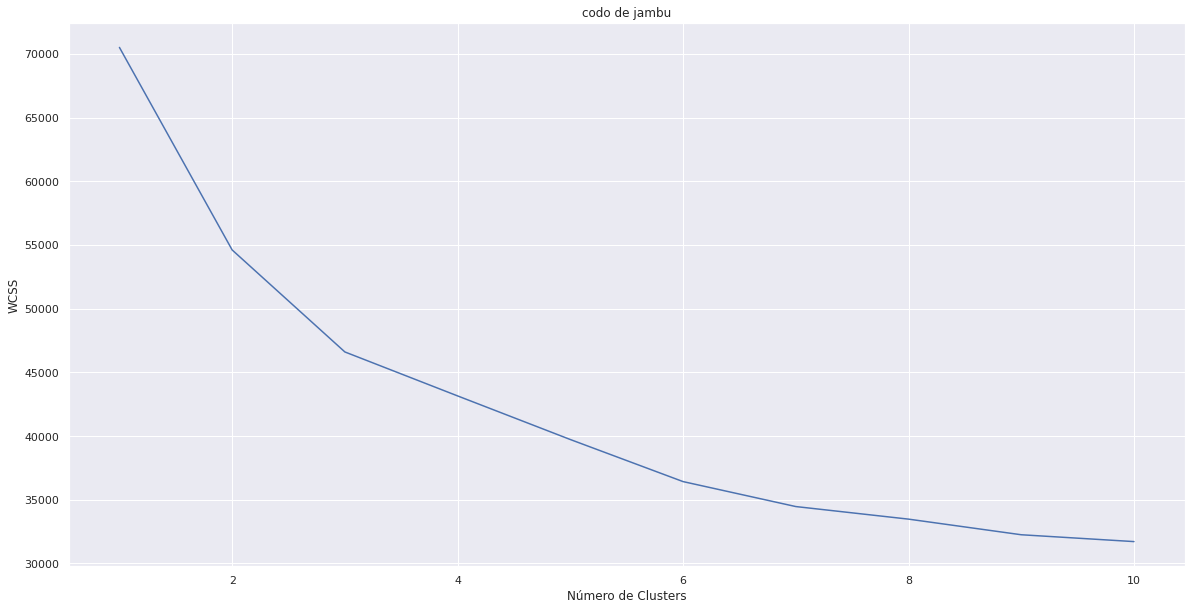

In [ ]:
# Grafico

plt.figure( figsize = [20,10] )
plt.plot(range(1 ,11), wcss )
plt.title('codo de jambu')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') #wcss. Es un indicador de qué tan similares son los individuos dentro de los clusters
plt.show()

Esta es la prueba evidente de que se forma una agrupacion en dos grupos

In [ ]:
# Aplicando K-Means a la base de datos
clustering = KMeans(n_clusters = 2, max_iter = 300) #Crea el modelo
clustering.fit(data_norm) #Aplica el modelo a la base de datos


KMeans(n_clusters=2)

In [ ]:
data['kmeans_clusters'] = clustering.labels_ # Los resultados del clustering se guardan en labels_ dentro del modelo
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,kmeans_clusters
0,56,4,2,1,0.0,0.0,0.0,2,5,1,...,0,0,2,1.1,93.994,-36.4,4.857,5191.0,0,1
1,57,8,2,4,0.0,0.0,0.0,2,5,1,...,0,0,2,1.1,93.994,-36.4,4.857,5191.0,0,1
2,37,8,2,4,0.0,1.0,0.0,2,5,1,...,0,0,2,1.1,93.994,-36.4,4.857,5191.0,0,1
3,40,1,2,2,0.0,0.0,0.0,2,5,1,...,0,0,2,1.1,93.994,-36.4,4.857,5191.0,0,1
4,56,8,2,4,0.0,0.0,1.0,2,5,1,...,0,0,2,1.1,93.994,-36.4,4.857,5191.0,0,1


In [34]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)

pca_data = pca.fit_transform(data_norm)
pca_datos_df = pd.DataFrame(data = pca_data, columns = ['Componente_1', 'Componente_2'])
pca_datos_uni = pd.concat([pca_datos_df, data[['kmeans_clusters']]], axis = 1)

pca_datos_uni

,Componente_1,Componente_2,kmeans_clusters
0,-0.798378,0.495628,1
1,-0.759028,0.481588,1
2,-0.622738,-0.496974,1
3,-0.794462,0.495155,1
4,-0.752523,0.413165,1
...,...,...,...
41183,1.009348,-0.275285,0
41184,0.695137,0.653653,0
41185,0.848878,-0.332207,0
41186,0.884434,0.698876,0


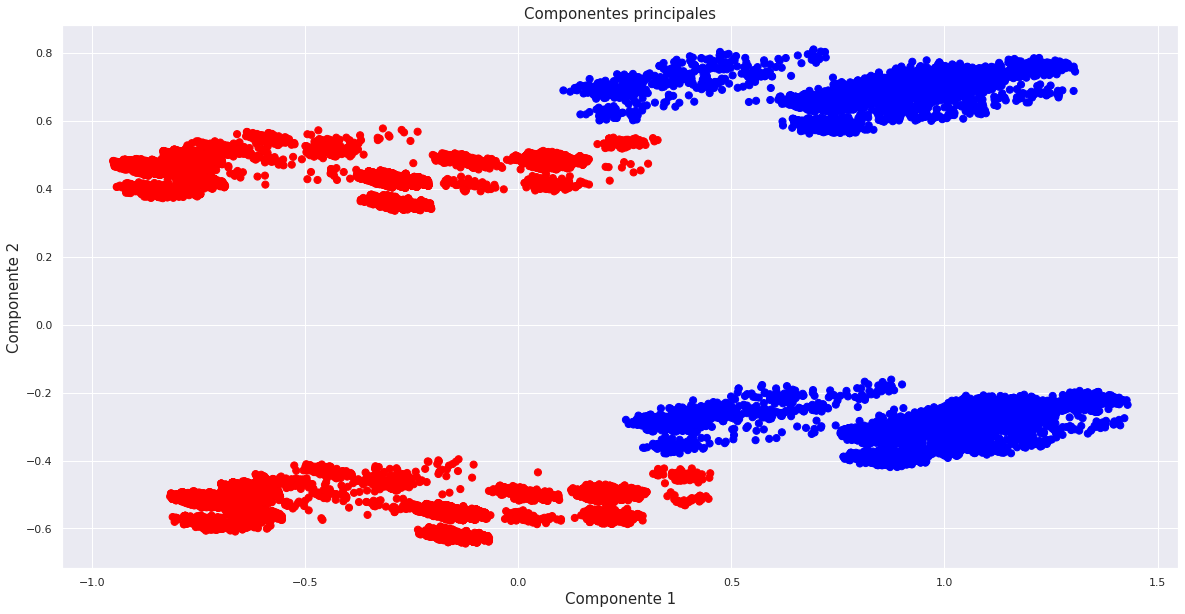

In [ ]:
fig = plt.figure( figsize = [20,10] )

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1' , fontsize = 15)
ax.set_ylabel('Componente 2' , fontsize = 15)
ax.set_title( 'Componentes principales' , fontsize = 15 )

color_theme = np.array([ 'blue' , 'red' ])
ax.scatter(x = pca_datos_uni.Componente_1, y = pca_datos_uni.Componente_2, 
            c = color_theme[pca_datos_uni['kmeans_clusters']], s = 50)

plt.show()

Se puede concluir la aglomeracion en dos grupos del dataset compuesto como resultado de la variable 'target' y es un poco complicado en este caso tomarse la decision de declarar outliers sin considerar la perspectiva real de negocio (en este caso una persona del rubro tendria mejor nocion al decir que variables tienen outliers o si realmente eliminar outliers) pero en la analisis de cientifico de datos diria que los supuestos outliers son debido a que las variables que son parte de la cotidianeidad laboral para concretar un prestamo a modo de historial de caso son las columnas 'duration' , 'pdays', 'previous', 'campaign', 'poutcome', 'contact' y se podrian eliminar ya que no dicen nada en cuanto a afectar nuestra variable 'target'.

# Modelado

**Reduccion de la dimensionalidad**

primeramente se comparan las distribuciones de los datasets sin transformaciones ni escalado con (data) con el que recibio la ingenieria de variables (data_norm)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


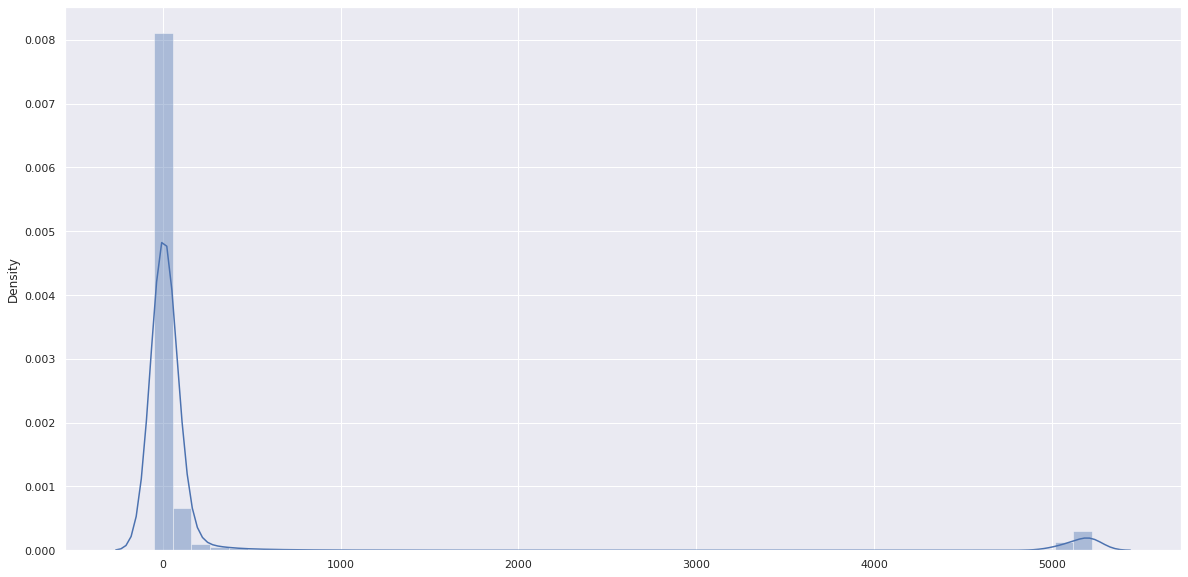

In [ ]:
# Distribucion dataset (data)

plt.figure( figsize = [20,10] )
sns.distplot(data)

El conjunto de datos cuenta con una distribucion normal sesgada hacia cero con una leve desviacion por el peso de los demas factores numericos de que se mencionaron antes en la deteccion de outlier con PCA.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



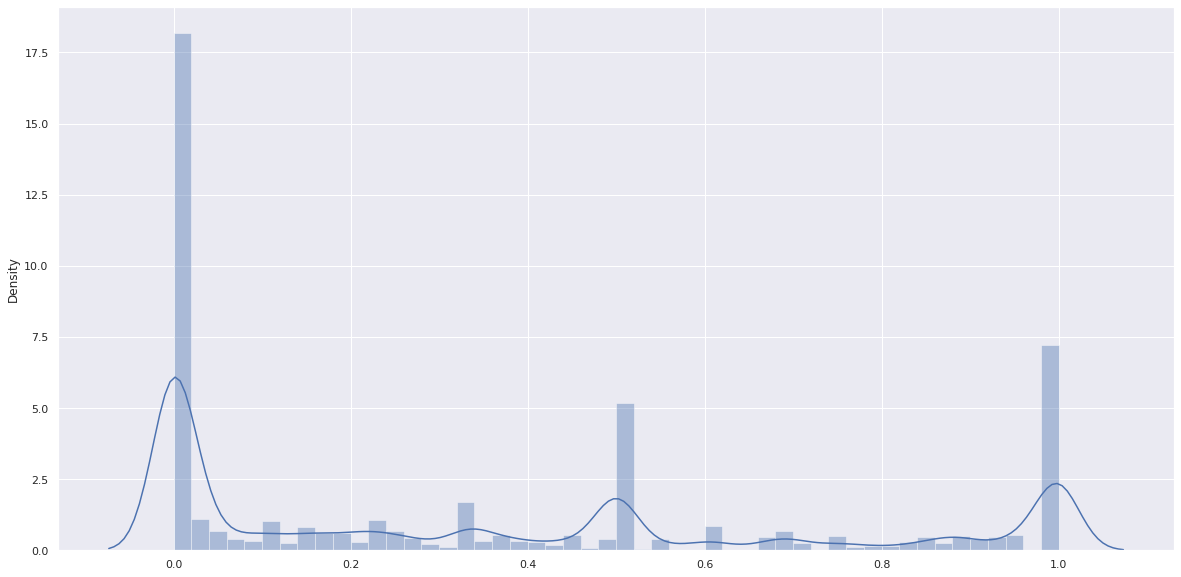

In [ ]:
# Distribucion dataset (data_norm)

plt.figure( figsize = [20,10] )
sns.distplot(data_norm)

Con este nuevo conjunto se puede ver mucho mas compactado en cuanto a la distribucion y ordernamiento de diferentes variables categoricas transformadas y para las variables bimodales son las que destacan en el grafico con los unos. 
Lo mas importante de esto es destacar la distribucion de los valores atipicos y que en cero se redujo bastante a lo que era antes.

El siguiente paso es separar los la variable 'target'de data_norm de las demas variables para voilver a aplicar PCA y verificar una posible reduccion de dimensiones identificando una extraccion de variables mas influyentes entre si y eliminando las que no importan para optimizar lo mas posible el modelo sin que se pierda informacion.

In [30]:
# Normalizo de nuevo el conjunto de datos (data) con el fin de modificar su lectura de np.array a formato pandas Dataframe si no, no se podran separar variables para comenzar el modelado

data_definitivo = pd.DataFrame(MinMaxScaler().fit_transform(data), columns=data.columns, index=data.index)

In [54]:
# Se instancia el dataset definitivo como una variable X y se elimina la variable a predecir 'target' para asignarla a una variable independiente

X = data_definitivo.drop('target',   axis = 1 )

Y = data_definitivo.target.values.reshape(-1 , 1)

In [32]:
import plotly.express as px

In [35]:
# Se analizan la varianza del dataset X con una posible reduccion de 20 columnas a 10...

pca = PCA(n_components = 10)

pca.fit_transform(X)

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Componentes", "y": "Varianza Explicada"}
)

Habiendo aplicado analisis de componentes principales, en el dataset normalizado con MinMaxScaler (data_norm) para que el modelo tengo una varianza aceptable entre 80% - 86% se recomienda reducir a 7 variables el dataset para lograr compactar y simplificar los procesos de modelado.

# Benchmark

In [63]:
# Division de datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X, Y, test_size = 0.25 , stratify = Y )

In [64]:
# Entrenamiento usando Regresion Logistica y se usa el accuracy como metodo de evaluacion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

lr.fit(x_train , y_train)

y_pred = lr.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [65]:
# Importacion de matriz de confusion y reporte de clasificacion
from sklearn.metrics import confusion_matrix, classification_report
acc = accuracy_score(y_test , y_pred)
print('Accuracy = ' , acc * 100) 

Accuracy =  90.76430028163543


El modelo generaliza bien pero solo queda ver los reportes de la clasificacion

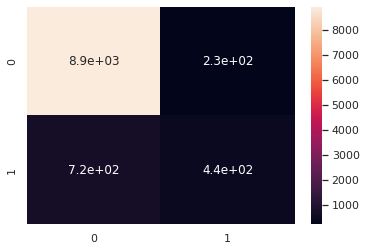

In [66]:
cm = confusion_matrix(y_test , y_pred)
sns.heatmap( cm , annot = True )

In [67]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      9137
         1.0       0.66      0.38      0.48      1160

    accuracy                           0.91     10297
   macro avg       0.79      0.68      0.71     10297
weighted avg       0.89      0.91      0.90     10297



Se ve que reconoce perfectamente a quienes no se les otorga el prestamo pero en cuanto a reconocer a quien se les puede prestar tenemos la clase completamente desbalanceada asi que se sigue haciendo pruebas.

# Segundo Modelo

In [68]:
# Entrenamiento usando Regresion Logistica y se usa el accuracy como metodo de evaluacion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression( class_weight = 'balanced'  )  # Esta vez se usa el hiperparametro con pesos de clases balanceadas

lr.fit(x_train , y_train)

y_pred = lr.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [69]:
# Importacion de matriz de confusion y reporte de clasificacion
from sklearn.metrics import confusion_matrix, classification_report
acc = accuracy_score(y_test , y_pred)
print('Accuracy = ' , acc * 100) 

Accuracy =  85.29668835583179


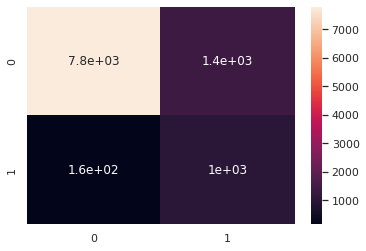

In [70]:
cm = confusion_matrix(y_test , y_pred)
sns.heatmap( cm , annot = True )

In [71]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      9137
         1.0       0.42      0.86      0.57      1160

    accuracy                           0.85     10297
   macro avg       0.70      0.86      0.74     10297
weighted avg       0.92      0.85      0.87     10297



Aca ligeramente cambia la aprobacion de quienes reciben el credito con recall y un ligero aumento en f1-score aunque sigue sin servir.

# Tercer modelo

In [79]:
# Entrenamiento usando Regresion Logistica y se usa el accuracy como metodo de evaluacion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression( C = 1.0 , penalty = 'l2' , solver = 'newton-cg' , class_weight = 'balanced'  )  # Esta vez se usa el hiperparametro con pesos de clases balanceadas , penalidad l2 'ridge' para que simplifique el modelo en cuanto a la gravedad de correlacion entre variables a la hora de evaluar

lr.fit(x_train , y_train)

y_pred = lr.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [80]:
# Importacion de matriz de confusion y reporte de clasificacion
from sklearn.metrics import confusion_matrix, classification_report
acc = accuracy_score(y_test , y_pred)
print('Accuracy = ' , acc * 100) 

Accuracy =  85.29668835583179


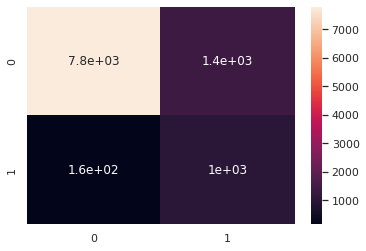

In [81]:
cm = confusion_matrix(y_test , y_pred)
sns.heatmap( cm , annot = True )

In [82]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      9137
         1.0       0.42      0.86      0.57      1160

    accuracy                           0.85     10297
   macro avg       0.70      0.86      0.74     10297
weighted avg       0.92      0.85      0.87     10297



Da el mismo rendimiento que el segundo modelo sin cambiar nada.

# Subsampling

Se usara subsampling para balancear las clases con la eliminacion de las muestras con mas sesgo (en este caso las personas que NO fueron aprobadas)

In [94]:
from imblearn.under_sampling import NearMiss

In [98]:
us = NearMiss(n_neighbors = 3, version = 2)

X_ss , Y_ss = us.fit_resample(X , Y)

In [100]:
# Division de datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X_ss, Y_ss, test_size = 0.20)

In [101]:
# Entrenamiento usando Regresion Logistica y se usa el accuracy como metodo de evaluacion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression( class_weight = 'balanced'  )  # Se vuelve a usar el hiperparametro con pesos de clases balanceadas

lr.fit(x_train , y_train)

y_pred = lr.predict(x_test)

In [102]:
# Importacion de matriz de confusion y reporte de clasificacion
from sklearn.metrics import confusion_matrix, classification_report
acc = accuracy_score(y_test , y_pred)
print('Accuracy = ' , acc * 100) 

Accuracy =  87.66163793103449


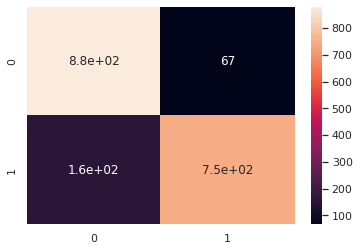

In [104]:
cm = confusion_matrix(y_test , y_pred)
sns.heatmap( cm , annot = True )

In [103]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88       946
         1.0       0.92      0.82      0.87       910

    accuracy                           0.88      1856
   macro avg       0.88      0.88      0.88      1856
weighted avg       0.88      0.88      0.88      1856



Presenta mejor recepcion de positivos y negativos en el f1-score.

# Oversampling

Ahora en lugar de disminuir el sesgo de los negativos, se balancearan los positivos

In [106]:
from imblearn.over_sampling import SMOTE

In [109]:
oversample = SMOTE(random_state = 42)
X_os , Y_os = oversample.fit_resample(X , Y)
Y_os.shape

(73096,)

In [110]:
# Division de datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X_os, Y_os, test_size = 0.25)

# Cuarto modelo

In [112]:
# Entrenamiento usando Regresion Logistica y se usa el accuracy como metodo de evaluacion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

lr.fit(x_train , y_train)

y_pred = lr.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [113]:
# Importacion de matriz de confusion y reporte de clasificacion
from sklearn.metrics import confusion_matrix, classification_report
acc = accuracy_score(y_test , y_pred)
print('Accuracy = ' , acc * 100) 

Accuracy =  86.93772573054613


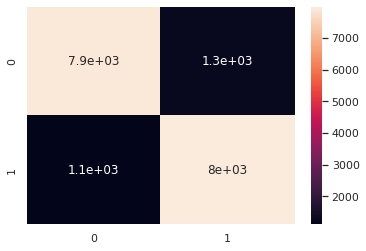

In [114]:
cm = confusion_matrix(y_test , y_pred)
sns.heatmap( cm , annot = True )

In [115]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      9181
         1.0       0.86      0.88      0.87      9093

    accuracy                           0.87     18274
   macro avg       0.87      0.87      0.87     18274
weighted avg       0.87      0.87      0.87     18274



Con oversampling presenta una mayor estabilidad entre clases y por una cantidad de 9181 negativos y 9093 negativos con un f1-score de 0.87

# Quinto modelo

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rfc = RandomForestClassifier()
rfc.fit(x_train , y_train)

RandomForestClassifier()

In [118]:
y_pred = rfc.predict(x_test)

In [120]:
acc = accuracy_score(y_test , y_pred)
print('Accuracy = ',  acc * 100)

Accuracy =  95.09685892524898


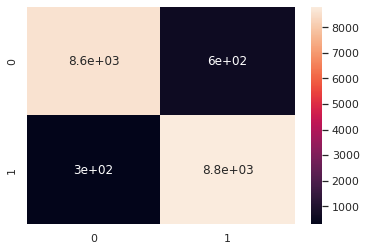

In [121]:
cm = confusion_matrix(y_test , y_pred)
sns.heatmap( cm , annot = True )

In [122]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      9181
         1.0       0.94      0.97      0.95      9093

    accuracy                           0.95     18274
   macro avg       0.95      0.95      0.95     18274
weighted avg       0.95      0.95      0.95     18274



Finalmente se logra conseguir el modelo ideal con una alta precision de 95% donde el f1-score que es lo mas conveniente para el balanceo de clases con 95% de rechazos y lo que ahora queda es comprobar que este resultado no haya sido por solo coincidencia sino que sea consistente con diferentes extracciones de datos y para esto se usara GridSerachCV

In [125]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [134]:
# Creo un diccionario padre que contenga varios diccionarios hijos los cuales cada uno tendra un algoritmo con diferentes hiperparametros 
model_params = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params' : {
            'C': [1,5,10],
            'penalty': ['l2'],
            "solver" : ['newton-cg'],
            'class_weight' : ['balanced']
        }  
    },
    'Random_Forest_Classi': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [250,400,550]
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,2,3,5]
        }
    },
    
     'SVC' : {
        'model': svm.SVC(),
        'params': {
            
        }
    }
}

In [129]:
from sklearn.model_selection import GridSearchCV

In [133]:
# Se crea una variable que contenga una lista vacia donde a travez de un ciclo for se empleara GridSearchValidationScore que itera 3 revisiones por cada combinacion de hiperparametro en cada algoritmo
# donde esos resultados se agregan a la lista en la variable 'scores' y luego se visualizan en formato Pandas DataFrame
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,LogisticRegression,0.872642,"{'C': 15, 'class_weight': 'balanced', 'penalty..."
1,Random_Forest_Classi,0.947977,{'n_estimators': 550}
2,KNN,0.929134,{'n_neighbors': 1}
3,SVC,0.896155,{}


El proyecto ha sido completado desde la revision estadistica, ingenieria de variables hasta su proceso de modelado obteniendo resultados positivamente donde se comprueban que NO son resultados aleatorios e incluso implementando hasta 2 modelos alternos con Random Forest Classifier con 95% de acertividad con una profundidad de 550 bosques y K-Vecinos mas Cercanos por 93% con 1 vecino de aproximacion.

Tambien se considera un muy buen score con el modelo de Support Vector Machine Classifier simple sin modificacion de hiperparametros con 90% de precision y Regresion logistica con un modesto score de 87%.

Todo un exito.

# Angelo Mauro Calderon